<a href="https://www.kaggle.com/code/christiancomena/an-lisis-predictivo-de-accidentes-vehiculares?scriptVersionId=159306027" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Análisis Predictivo de Accidentes Vehiculares**

El presente trabajo está enfocado en la previsión de los accidentes vehiculares, enfocado en el Análisis Exploratorio de Datos, Pre-procesamiento de Datos y la implementación de Modelos de Machine Learning. 

Este conjunto de datos proporciona registros detallados de los accidentes de tráfico ocurridos durante enero de 2021. Los datos son valiosos para analizar y comprender los factores que contribuyen a los accidentes de tráfico en esta zona urbana, ayudando en el desarrollo de estrategias para mejorar la seguridad vial.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-accident-dataset/Road Accident Data.csv


## **Data Adquisition**

In [2]:
#Obtención de los datos por el Dataset de Accidentes de Tránsito
dataCarros= pd.read_csv('/kaggle/input/car-accident-dataset/Road Accident Data.csv')

In [3]:
#Visualización general de los datos del dataset
dataCarros

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,1/1/2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,200901BS70002,1/5/2021,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,NaN,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,1/4/2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,1/5/2021,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,8:10,Urban,Other,Motorcycle over 500cc
4,200901BS70005,1/6/2021,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307968,201091NM01760,2/18/2022,Thursday,Data missing or out of range,Not at junction or within 20 metres,Slight,57.374005,Daylight,Highland,NaN,...,2,1,Northern,Dry,Single carriageway,60,7:00,Rural,Fine no high winds,Car
307969,201091NM01881,2/21/2022,Sunday,Data missing or out of range,Not at junction or within 20 metres,Slight,57.232273,Darkness - no lighting,Highland,NaN,...,1,1,Northern,Frost or ice,Single carriageway,60,3:00,Rural,Fine no high winds,Car
307970,201091NM01935,2/23/2022,Tuesday,Give way or uncontrolled,T or staggered junction,Slight,57.585044,Daylight,Highland,NaN,...,1,3,Northern,Frost or ice,Single carriageway,30,9:38,Rural,Fine no high winds,Car
307971,201091NM01964,2/23/2022,Tuesday,Give way or uncontrolled,T or staggered junction,Serious,57.214898,Darkness - no lighting,Highland,NaN,...,1,2,Northern,Wet or damp,Single carriageway,60,18:25,Rural,Fine no high winds,Motorcycle over 500cc


## **Diccionario de Datos**

Descripción detallada de cada uno de los campos abordados en el Dataset de Accidentes Vehiculares.

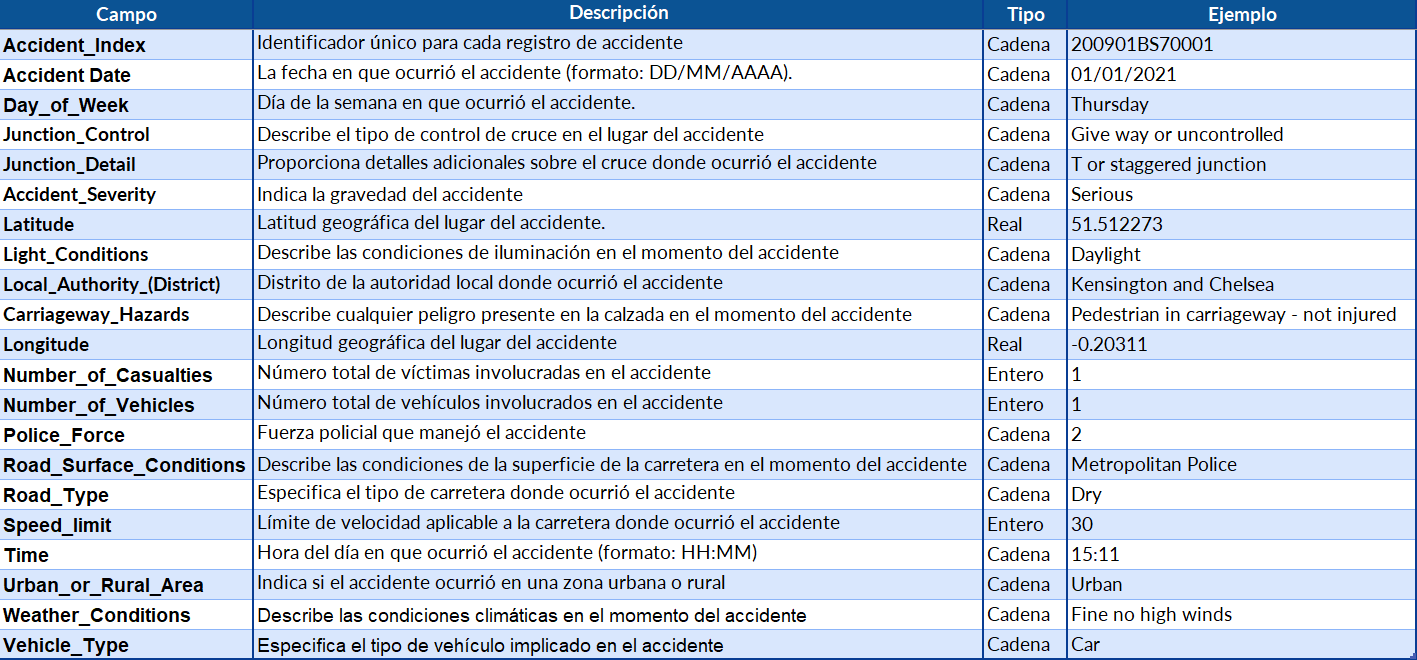)

# **Análisis Exploratorio de Datos (EDA)**

## **Análisis Descriptivo**

In [4]:
dataCarros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Accident_Index              307973 non-null  object 
 1   Accident Date               307973 non-null  object 
 2   Day_of_Week                 307973 non-null  object 
 3   Junction_Control            307973 non-null  object 
 4   Junction_Detail             307973 non-null  object 
 5   Accident_Severity           307973 non-null  object 
 6   Latitude                    307973 non-null  float64
 7   Light_Conditions            307973 non-null  object 
 8   Local_Authority_(District)  307973 non-null  object 
 9   Carriageway_Hazards         5424 non-null    object 
 10  Longitude                   307973 non-null  float64
 11  Number_of_Casualties        307973 non-null  int64  
 12  Number_of_Vehicles          307973 non-null  int64  
 13  Police_Force  

### **Análisis Descriptivo de variables Categóricas**

In [5]:
#Análisis de datos por tipo de entrada en cada uno de los campos categóricos
dataCarros_c = ['Day_of_Week','Junction_Control','Junction_Detail','Accident_Severity','Light_Conditions','Carriageway_Hazards',
                'Road_Surface_Conditions','Road_Type','Urban_or_Rural_Area','Weather_Conditions','Vehicle_Type']
for i in dataCarros_c:
    print('\nLos valores únicos de', i ,' son: ', dataCarros[i].unique())


Los valores únicos de Day_of_Week  son:  ['Thursday' 'Monday' 'Sunday' 'Tuesday' 'Friday' 'Wednesday' 'Saturday']

Los valores únicos de Junction_Control  son:  ['Give way or uncontrolled' 'Auto traffic signal'
 'Data missing or out of range' 'Authorised person' 'Stop sign'
 'Not at junction or within 20 metres' 'Auto traffic sigl']

Los valores únicos de Junction_Detail  son:  ['T or staggered junction' 'Crossroads'
 'Not at junction or within 20 metres' 'Roundabout' 'Mini-roundabout'
 'More than 4 arms (not roundabout)' 'Private drive or entrance'
 'Slip road' 'Other junction']

Los valores únicos de Accident_Severity  son:  ['Serious' 'Slight' 'Fetal' 'Fatal']

Los valores únicos de Light_Conditions  son:  ['Daylight' 'Darkness - lights lit' 'Darkness - lighting unknown'
 'Darkness - lights unlit' 'Darkness - no lighting']

Los valores únicos de Carriageway_Hazards  son:  [nan 'Pedestrian in carriageway - not injured' 'Other object on road'
 'Any animal in carriageway (except ridde

In [6]:
# Identificamos valores en el campo Accident_Severity que están incorrectamente redactados y reemplazamos
if 'Accident_Severity' in dataCarros.columns:
    dataCarros.loc[dataCarros['Accident_Severity'] == 'Fetal', 'Accident_Severity'] = 'Fatal'

In [7]:
#Etiqueta que utilizaremos para nuestro modelo de aprendizaje supervisado
dataCarros['Accident_Severity'].unique()

array(['Serious', 'Slight', 'Fatal'], dtype=object)

## **Análisis Univariado**

Se basa en el análisis de gráficas por cada una de las variables, resaltando las variables categóricas por su repitencia de valores.

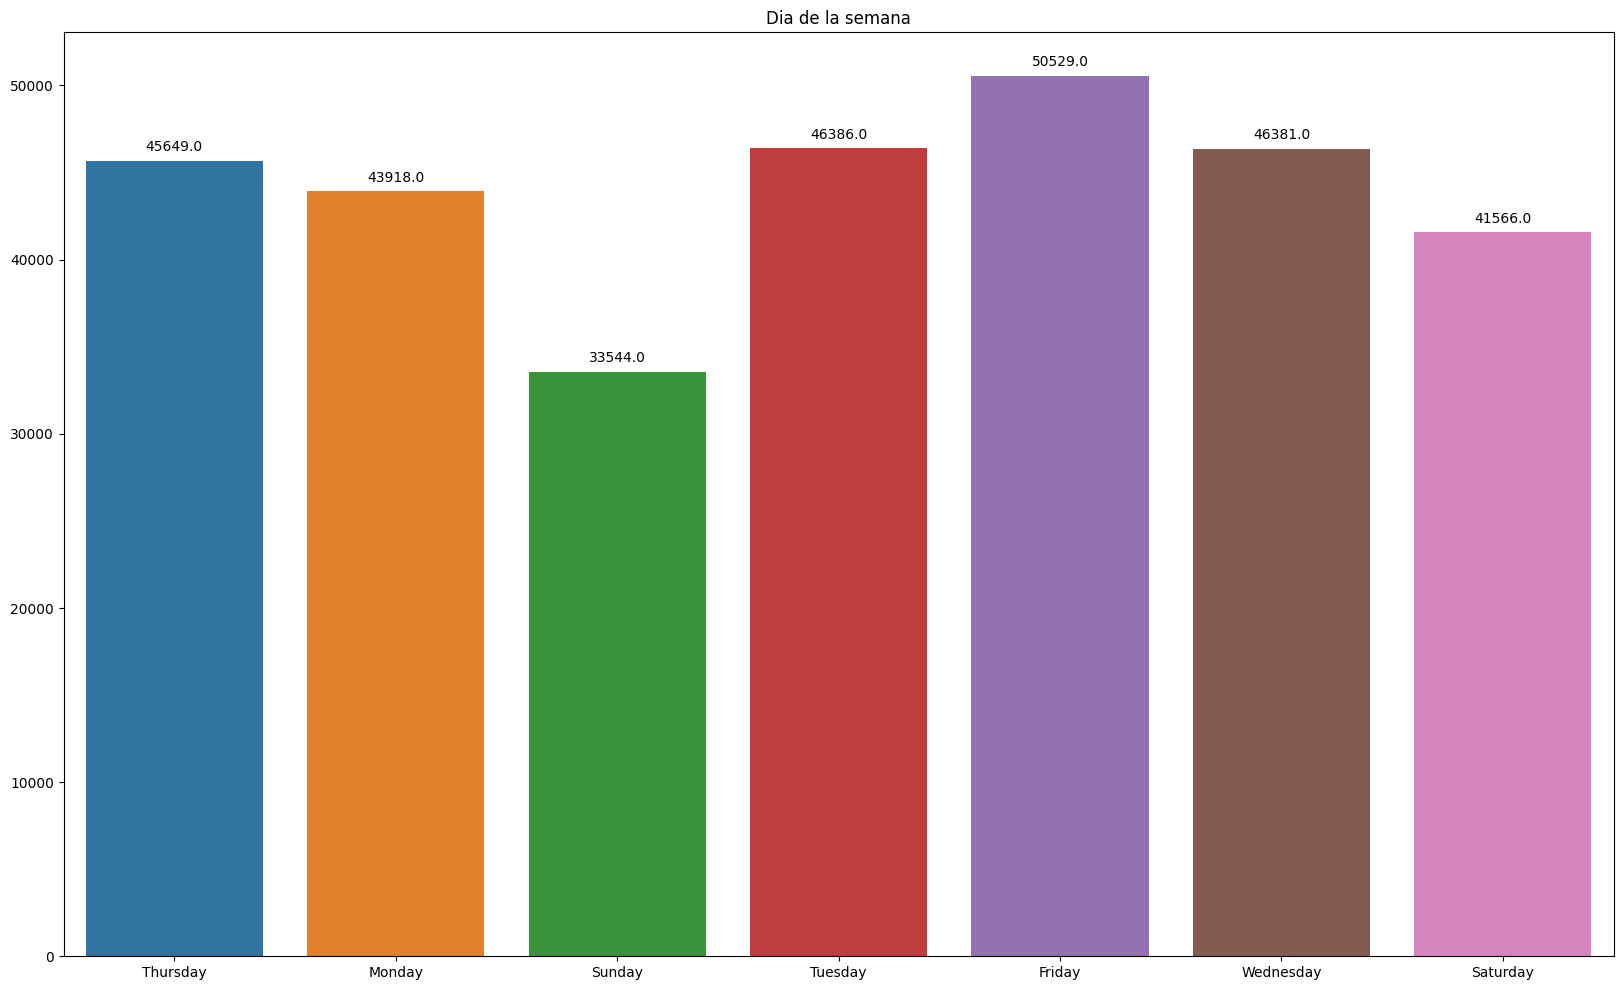

In [8]:
plt.figure(figsize=(20,12))
ax = sns.countplot(data = dataCarros, x = 'Day_of_Week')
# Agregar etiquetas de las cantidades encima de las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Dia de la semana')
plt.xlabel('')
plt.ylabel('')
plt.show()

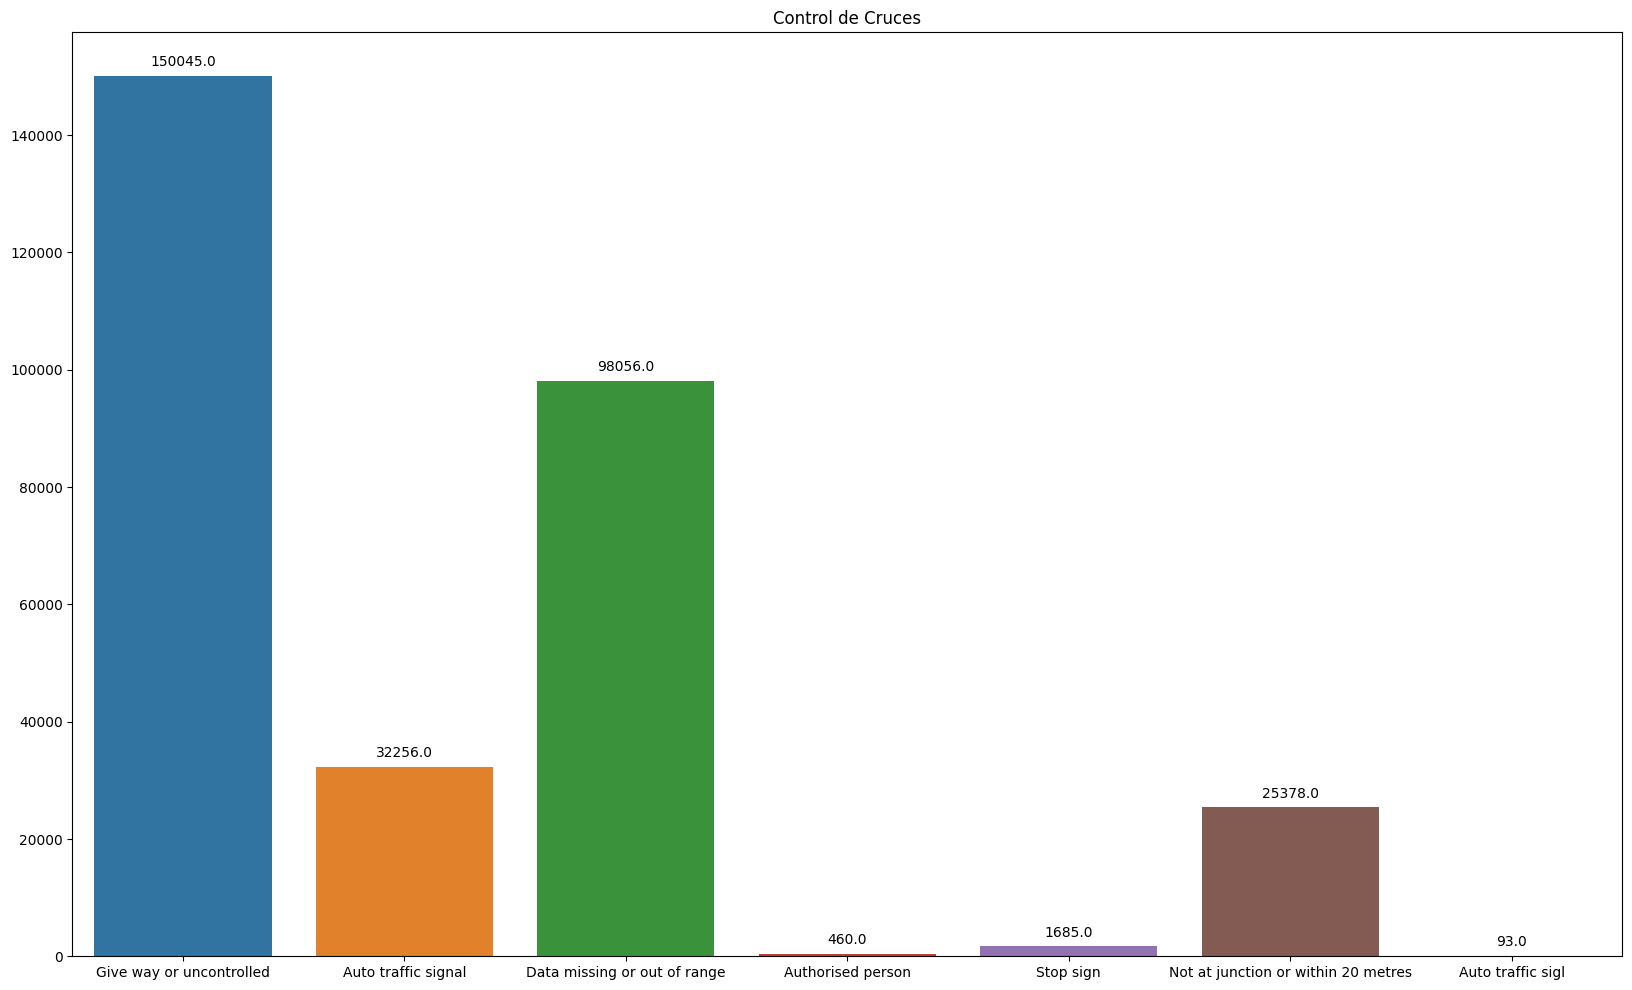

In [9]:
plt.figure(figsize=(20, 12))
ax = sns.countplot(data = dataCarros, x = 'Junction_Control')
# Agregar etiquetas de las cantidades encima de las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Control de Cruces')
plt.xlabel('')
plt.ylabel('')
plt.show()

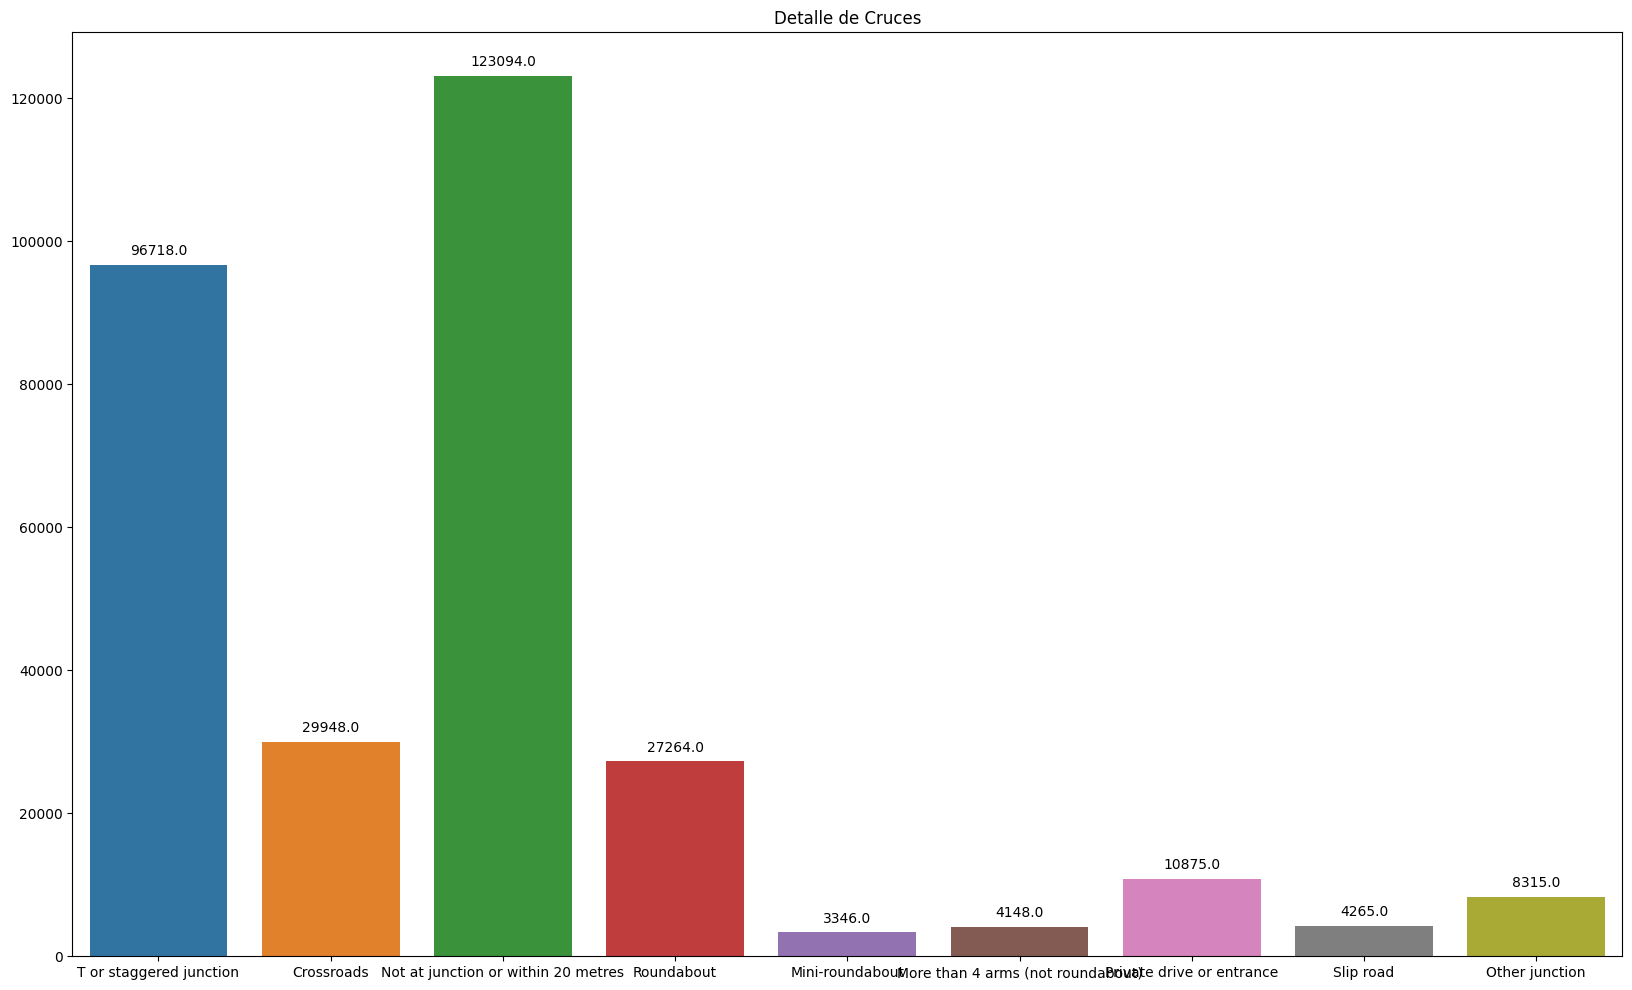

In [10]:
plt.figure(figsize=(20,12))
ax = sns.countplot(data = dataCarros, x = 'Junction_Detail')
# Agregar etiquetas de las cantidades encima de las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Detalle de Cruces')
plt.xlabel('')
plt.ylabel('')
plt.show()

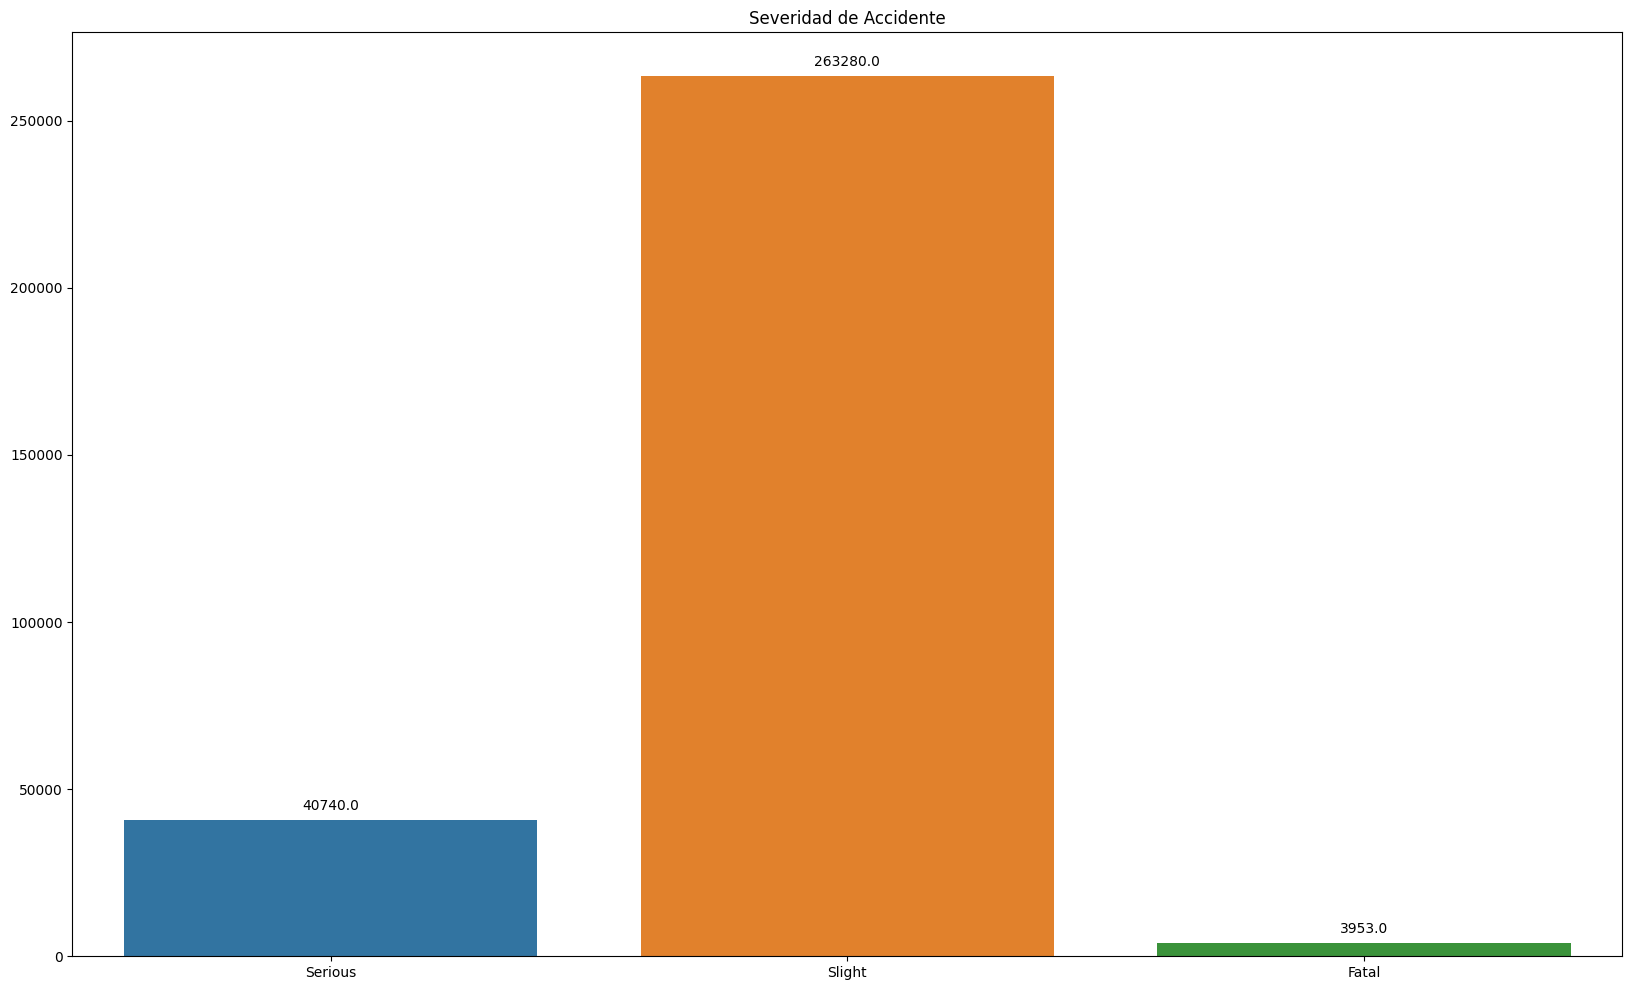

In [11]:
plt.figure(figsize=(20,12))
ax = sns.countplot(data = dataCarros, x = 'Accident_Severity')
# Agregar etiquetas de las cantidades encima de las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Severidad de Accidente')
plt.xlabel('')
plt.ylabel('')
plt.show()

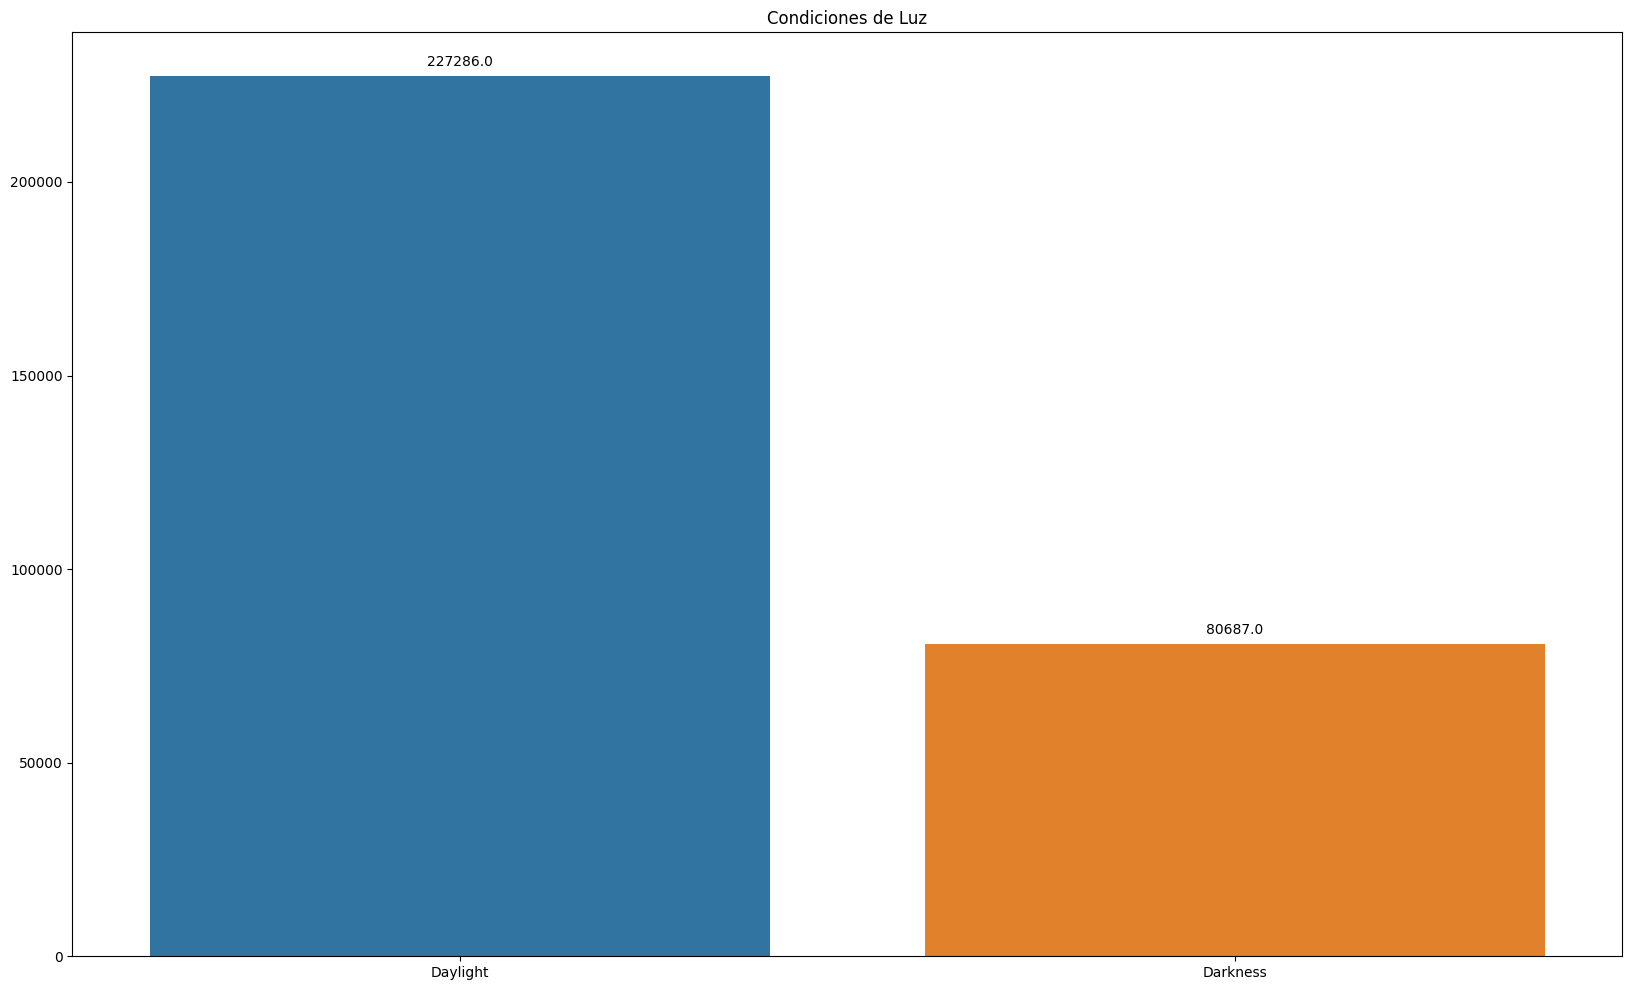

In [12]:
plt.figure(figsize=(20,12))
ax = sns.countplot(data = dataCarros, x = dataCarros['Light_Conditions'].str[:8])
# Agregar etiquetas de las cantidades encima de las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Condiciones de Luz')
plt.xlabel('')
plt.ylabel('')
plt.show()

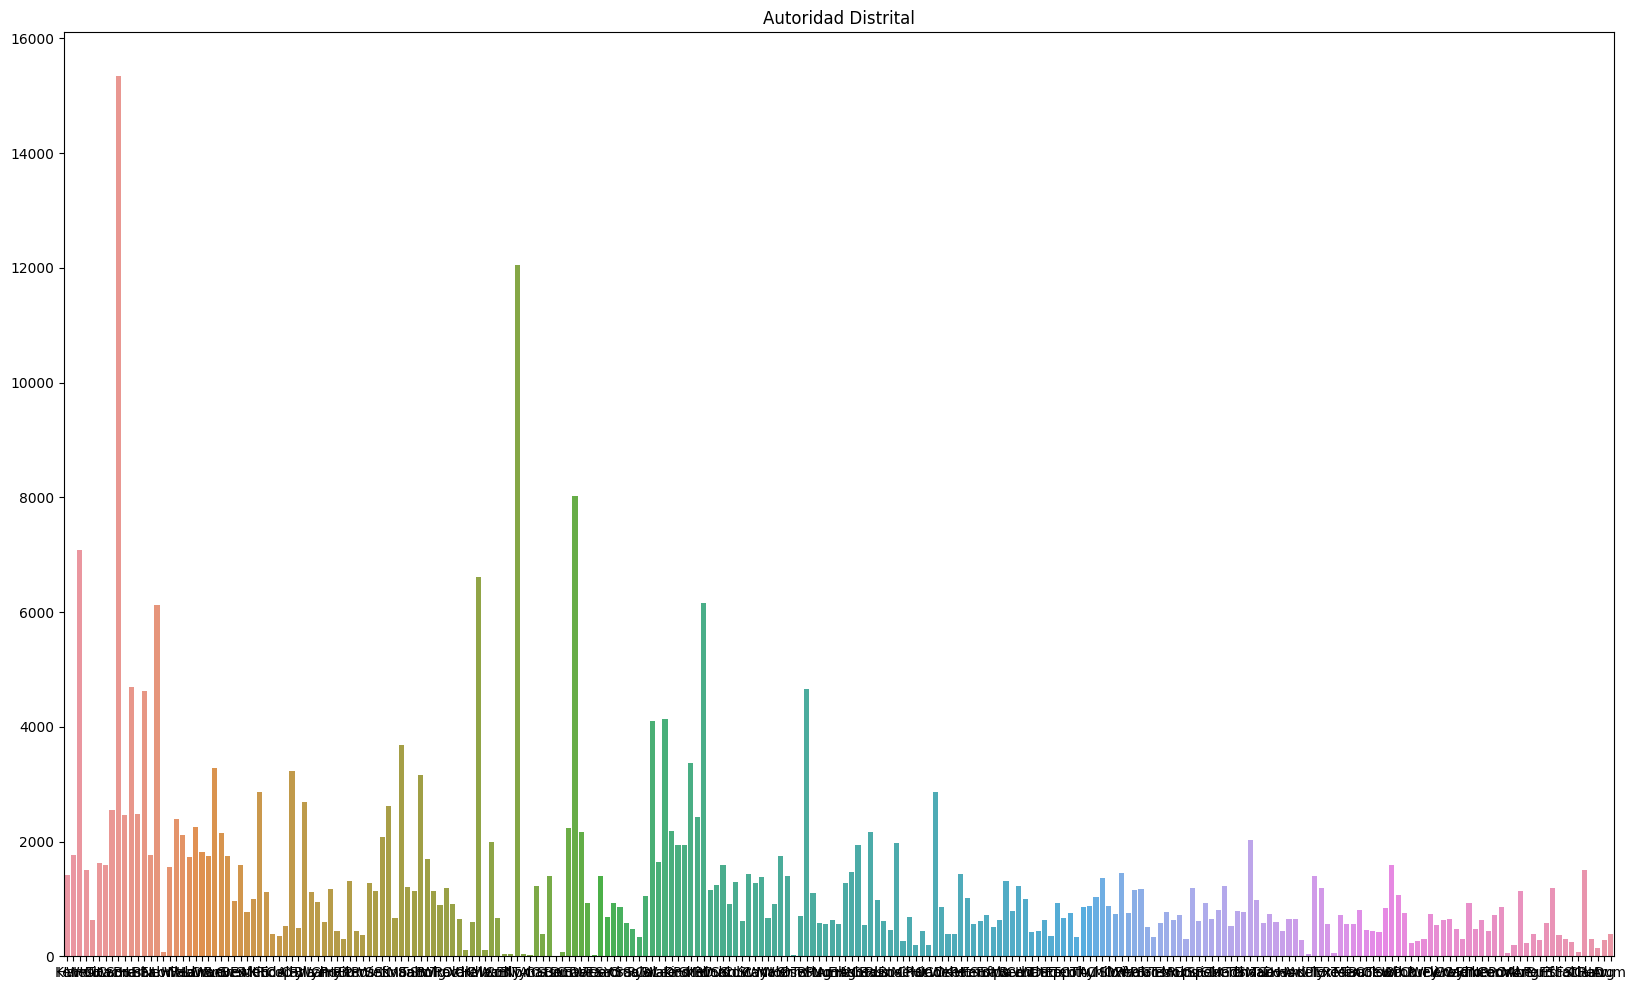

In [13]:
plt.figure(figsize=(20, 12))
ax = sns.countplot(data = dataCarros, x = dataCarros['Local_Authority_(District)'].str[:3])

plt.title('Autoridad Distrital')
plt.xlabel('')
plt.ylabel('')
plt.show()

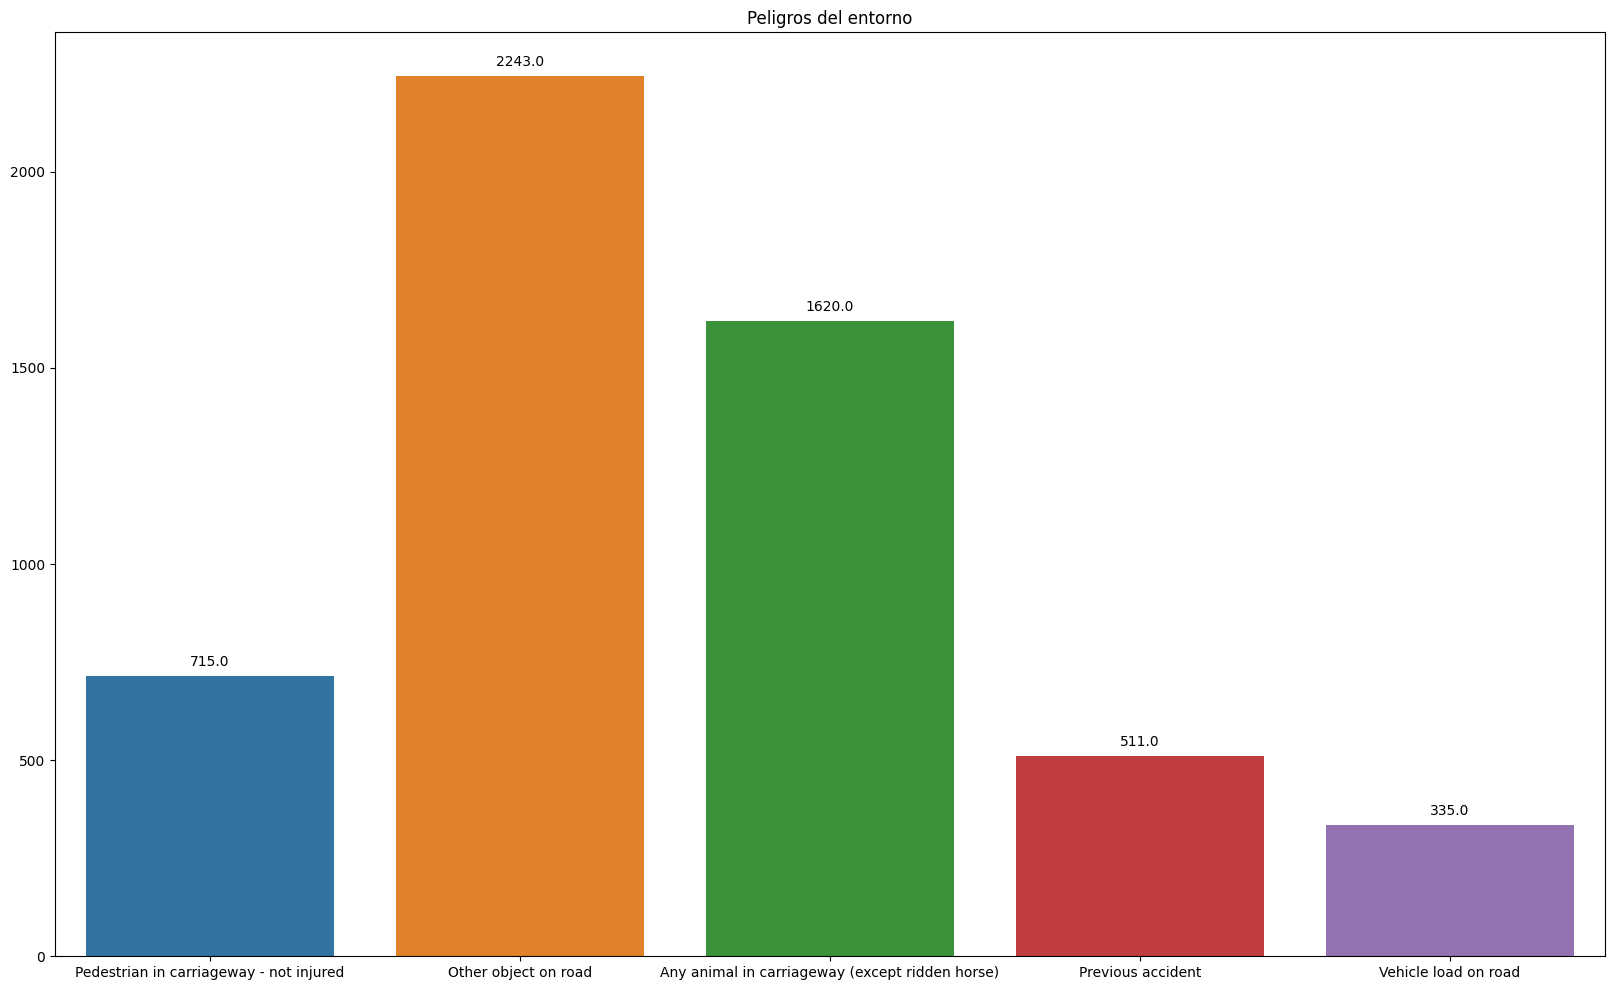

In [14]:
plt.figure(figsize=(20,12))
ax = sns.countplot(data = dataCarros, x = 'Carriageway_Hazards')

# Agregar etiquetas de las cantidades encima de las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.title('Peligros del entorno')
plt.xlabel('')
plt.ylabel('')
plt.show()

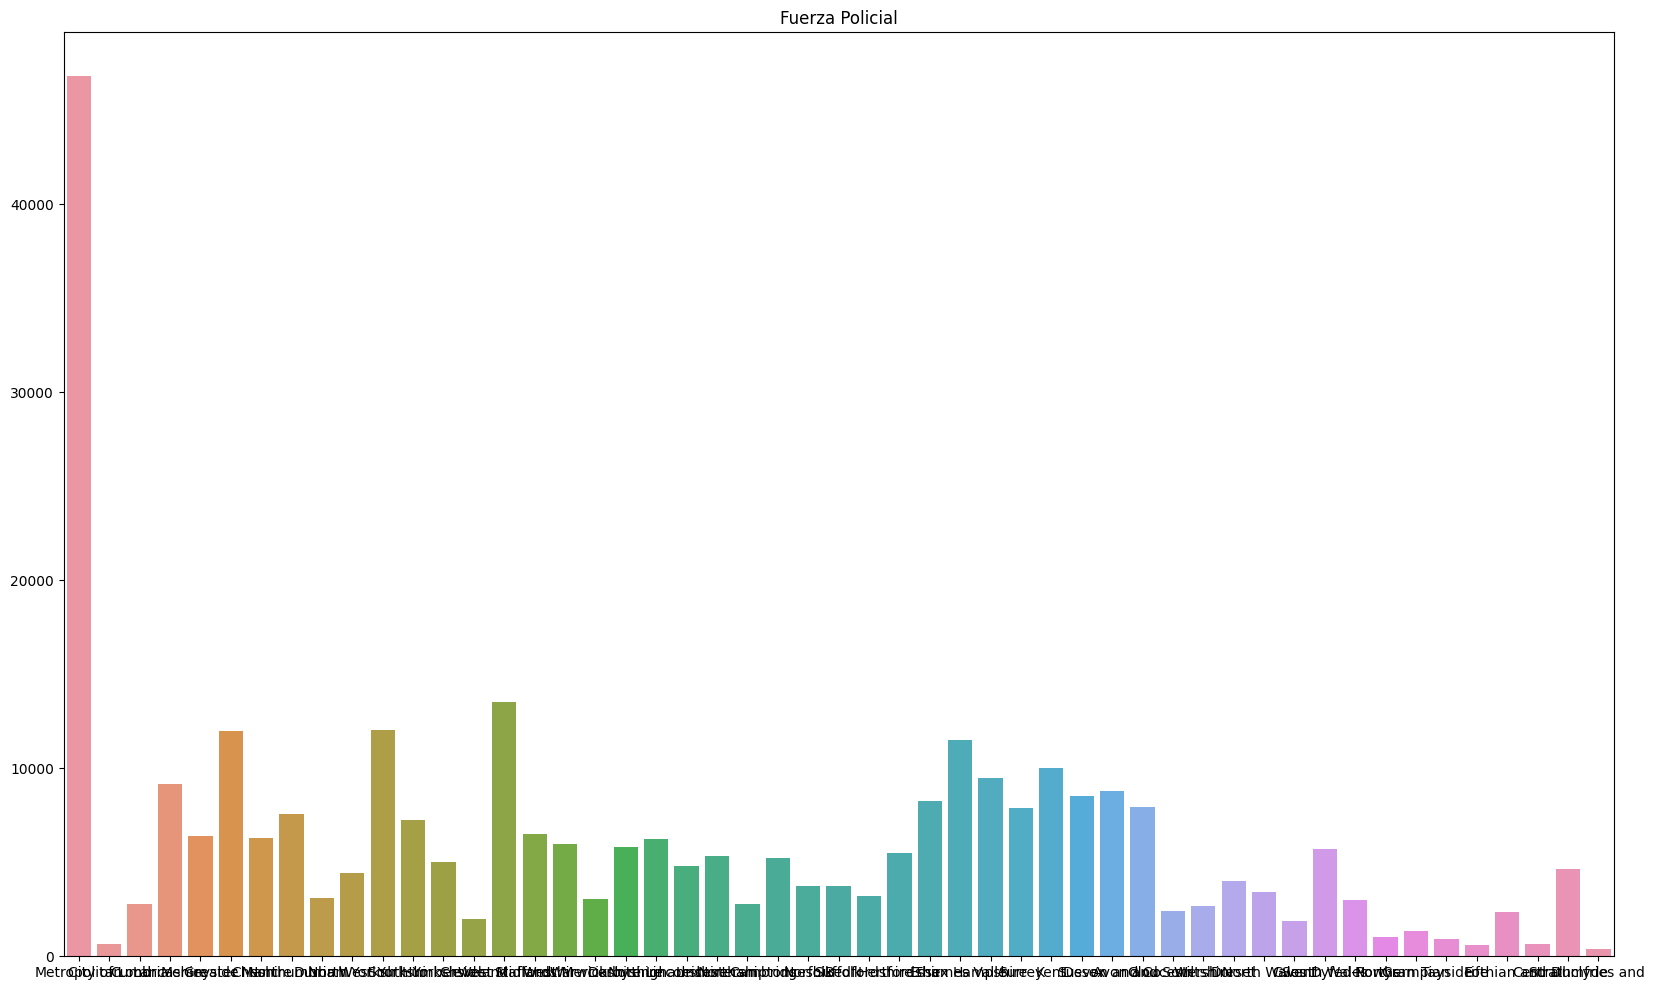

In [15]:
plt.figure(figsize=(20,12))
ax = sns.countplot(data = dataCarros, x = dataCarros['Police_Force'].str[:12])
    
plt.title('Fuerza Policial')
plt.xlabel('')
plt.ylabel('')
plt.show()


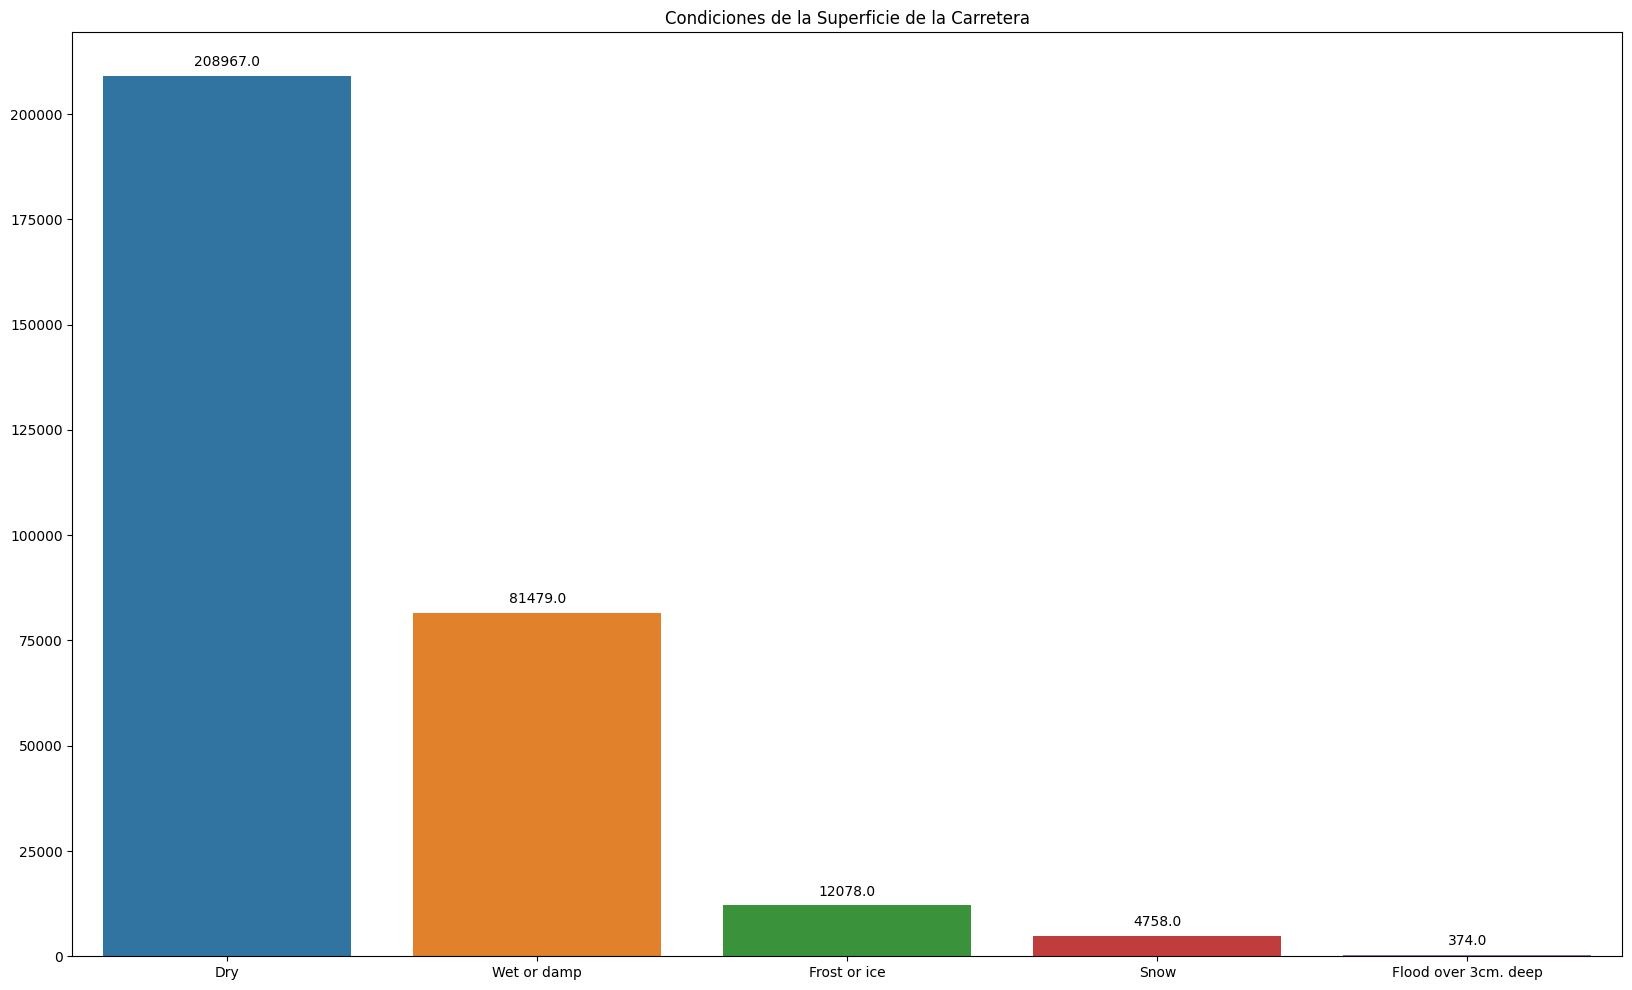

In [16]:
plt.figure(figsize=(20,12))
ax = sns.countplot(data = dataCarros, x = 'Road_Surface_Conditions')

# Agregar etiquetas de las cantidades encima de las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.title('Condiciones de la Superficie de la Carretera')
plt.xlabel('')
plt.ylabel('')
plt.show()

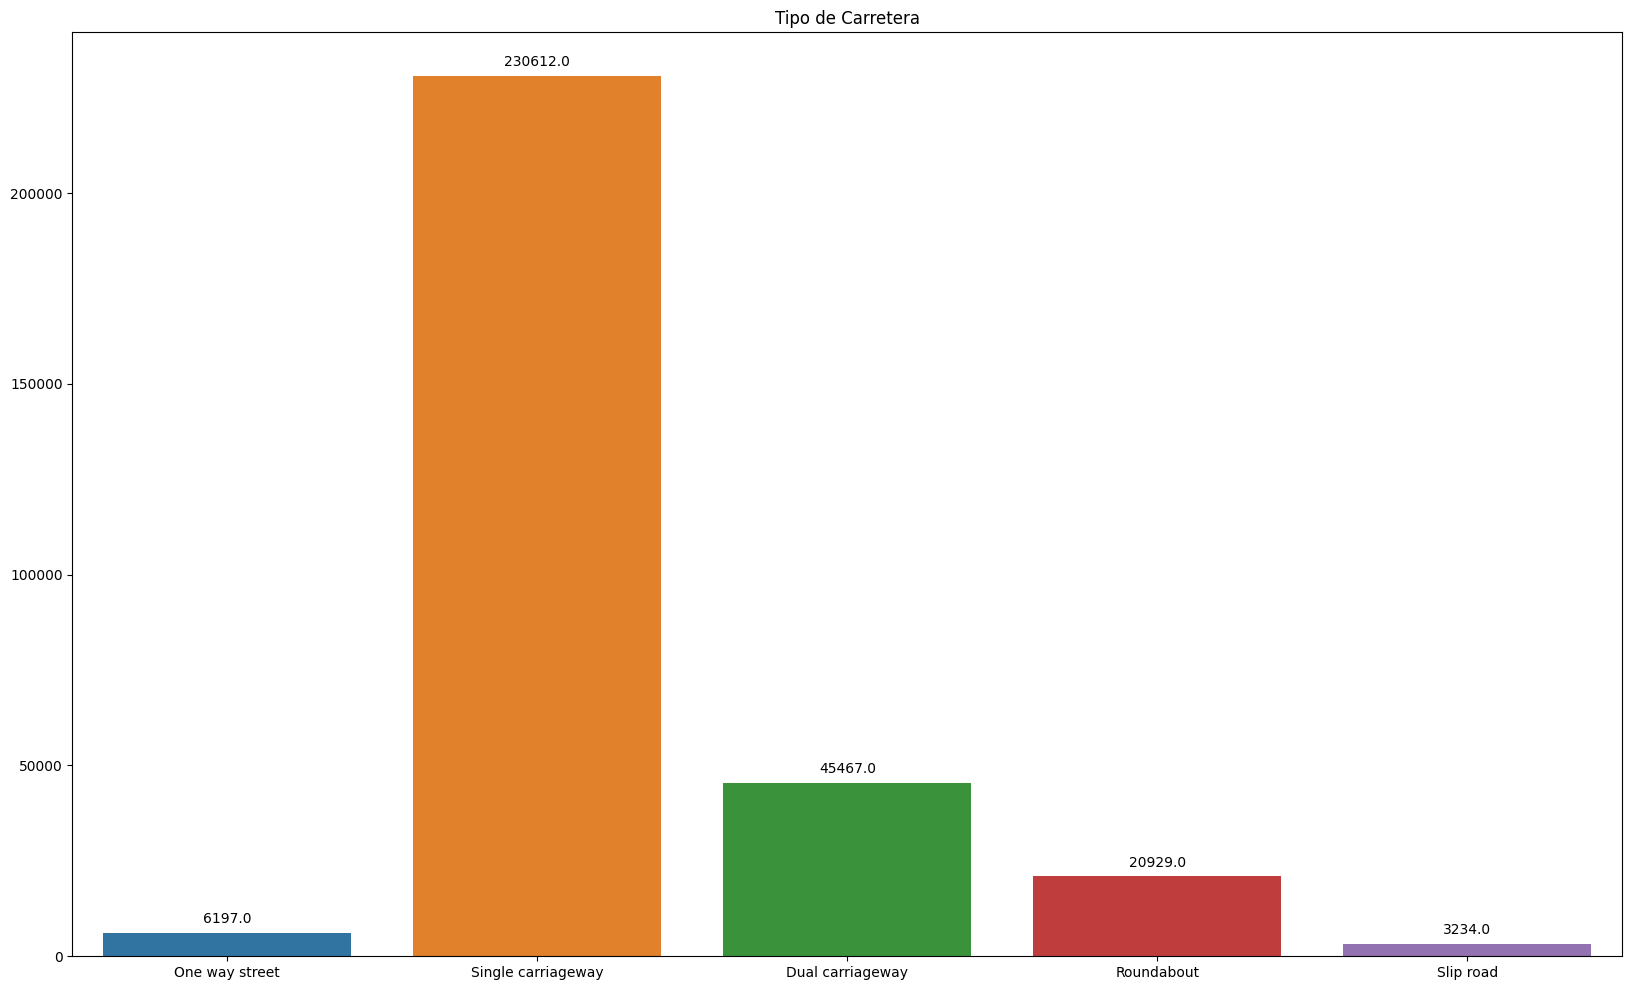

In [17]:
plt.figure(figsize=(20,12))
ax = sns.countplot(data = dataCarros, x = 'Road_Type')

# Agregar etiquetas de las cantidades encima de las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.title('Tipo de Carretera')
plt.xlabel('')
plt.ylabel('')
plt.show()

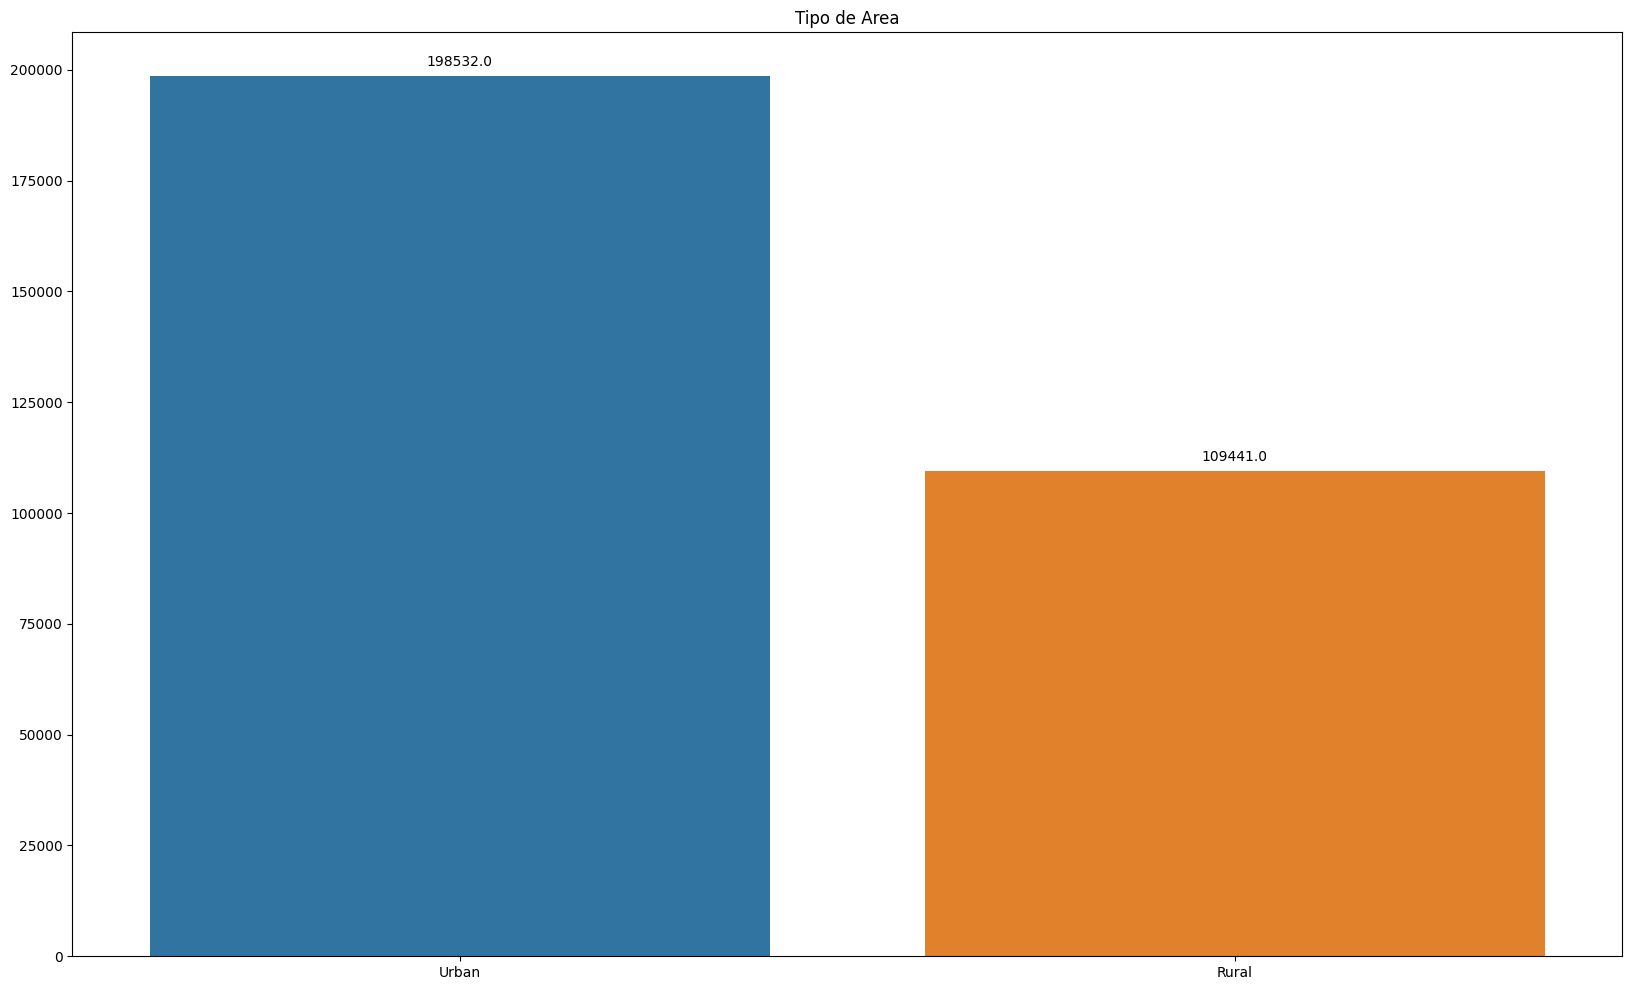

In [18]:
plt.figure(figsize=(20,12))
ax = sns.countplot(data = dataCarros, x = 'Urban_or_Rural_Area')

# Agregar etiquetas de las cantidades encima de las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Tipo de Area')
plt.xlabel('')
plt.ylabel('')
plt.show()

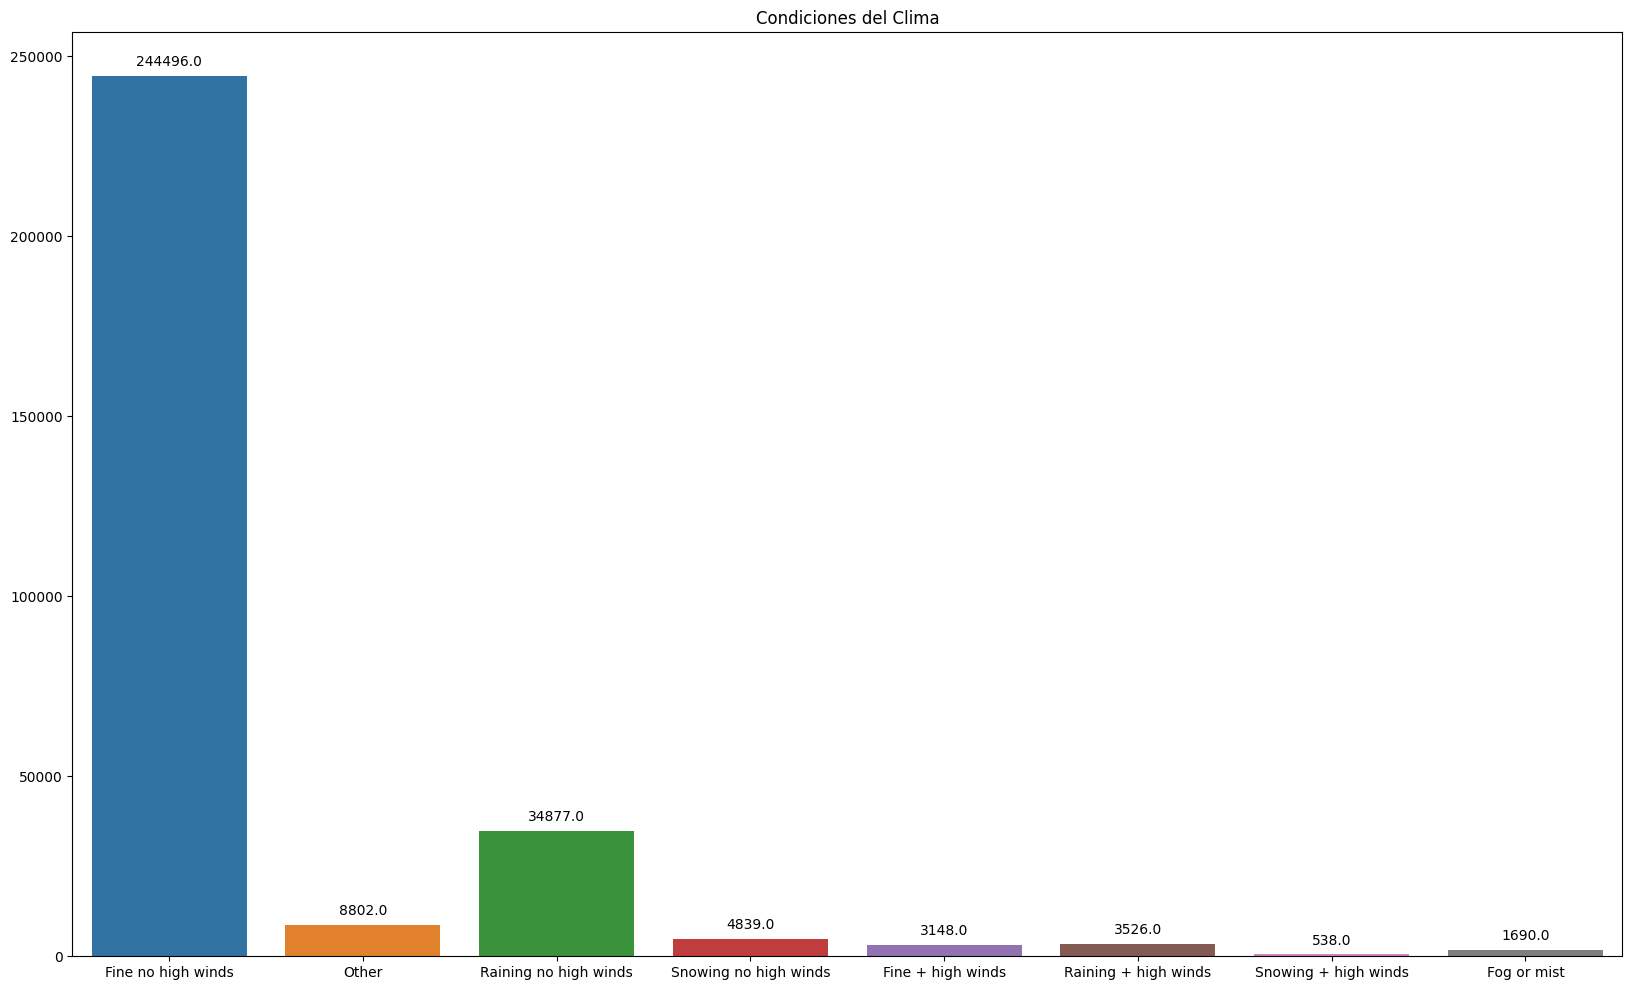

In [19]:
plt.figure(figsize=(20,12))
ax = sns.countplot(data = dataCarros, x = 'Weather_Conditions')

# Agregar etiquetas de las cantidades encima de las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.title('Condiciones del Clima')
plt.xlabel('')
plt.ylabel('')
plt.show()

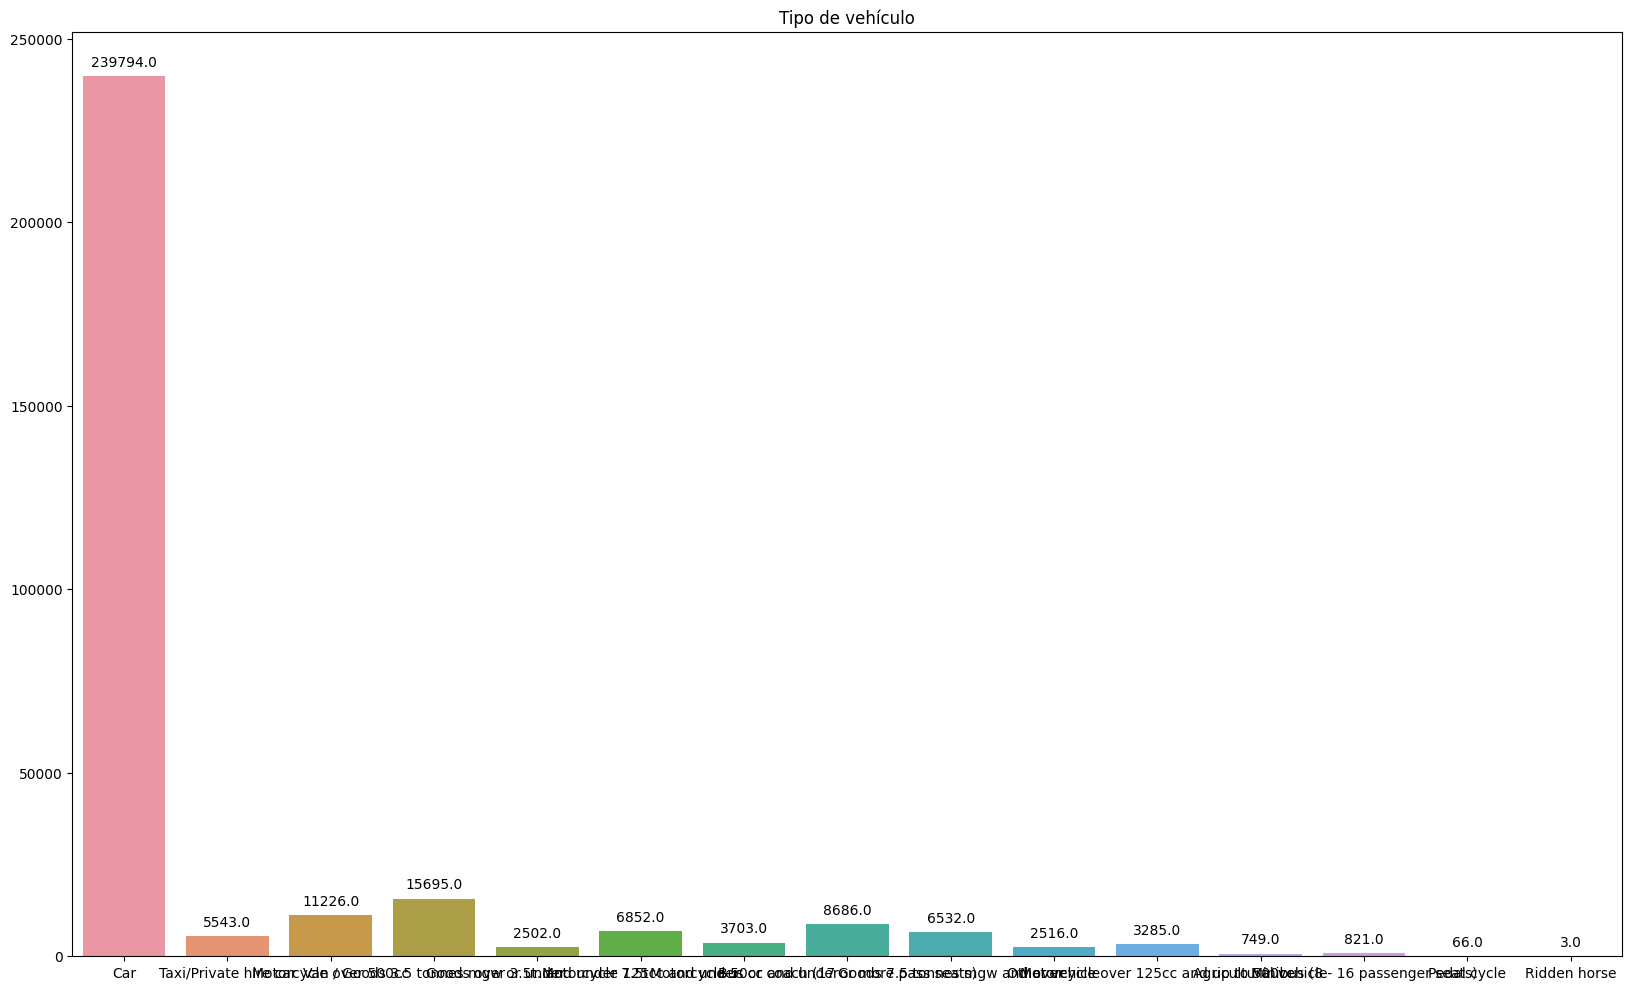

In [20]:
plt.figure(figsize=(20,12))
ax = sns.countplot(data = dataCarros, x = 'Vehicle_Type')

# Agregar etiquetas de las cantidades encima de las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.title('Tipo de vehículo')
plt.xlabel('')
plt.ylabel('')
plt.show()

# **Análisis Bivariado con la variable dependiente Severidad del Accidente**

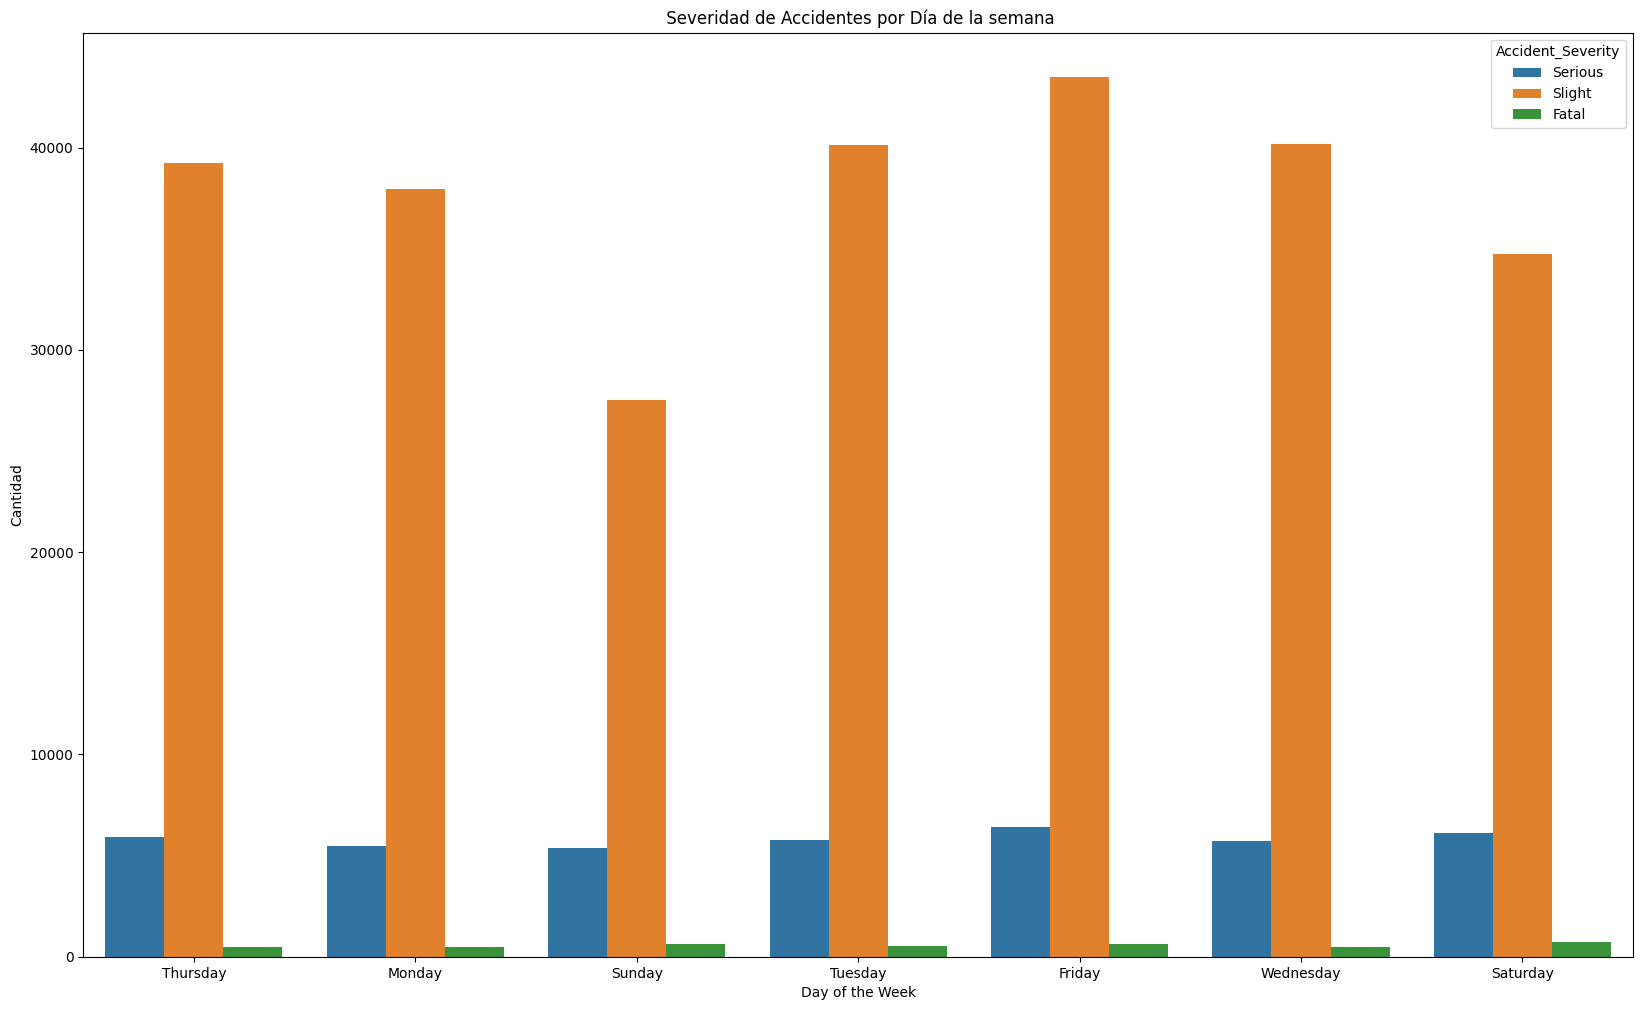

In [21]:
plt.figure(figsize=(20,12))
sns.countplot(data = dataCarros, x = 'Day_of_Week', hue = 'Accident_Severity')
plt.xlabel('Day of the Week')
plt.ylabel('Cantidad')
plt.title(' Severidad de Accidentes por Día de la semana')
plt.show()

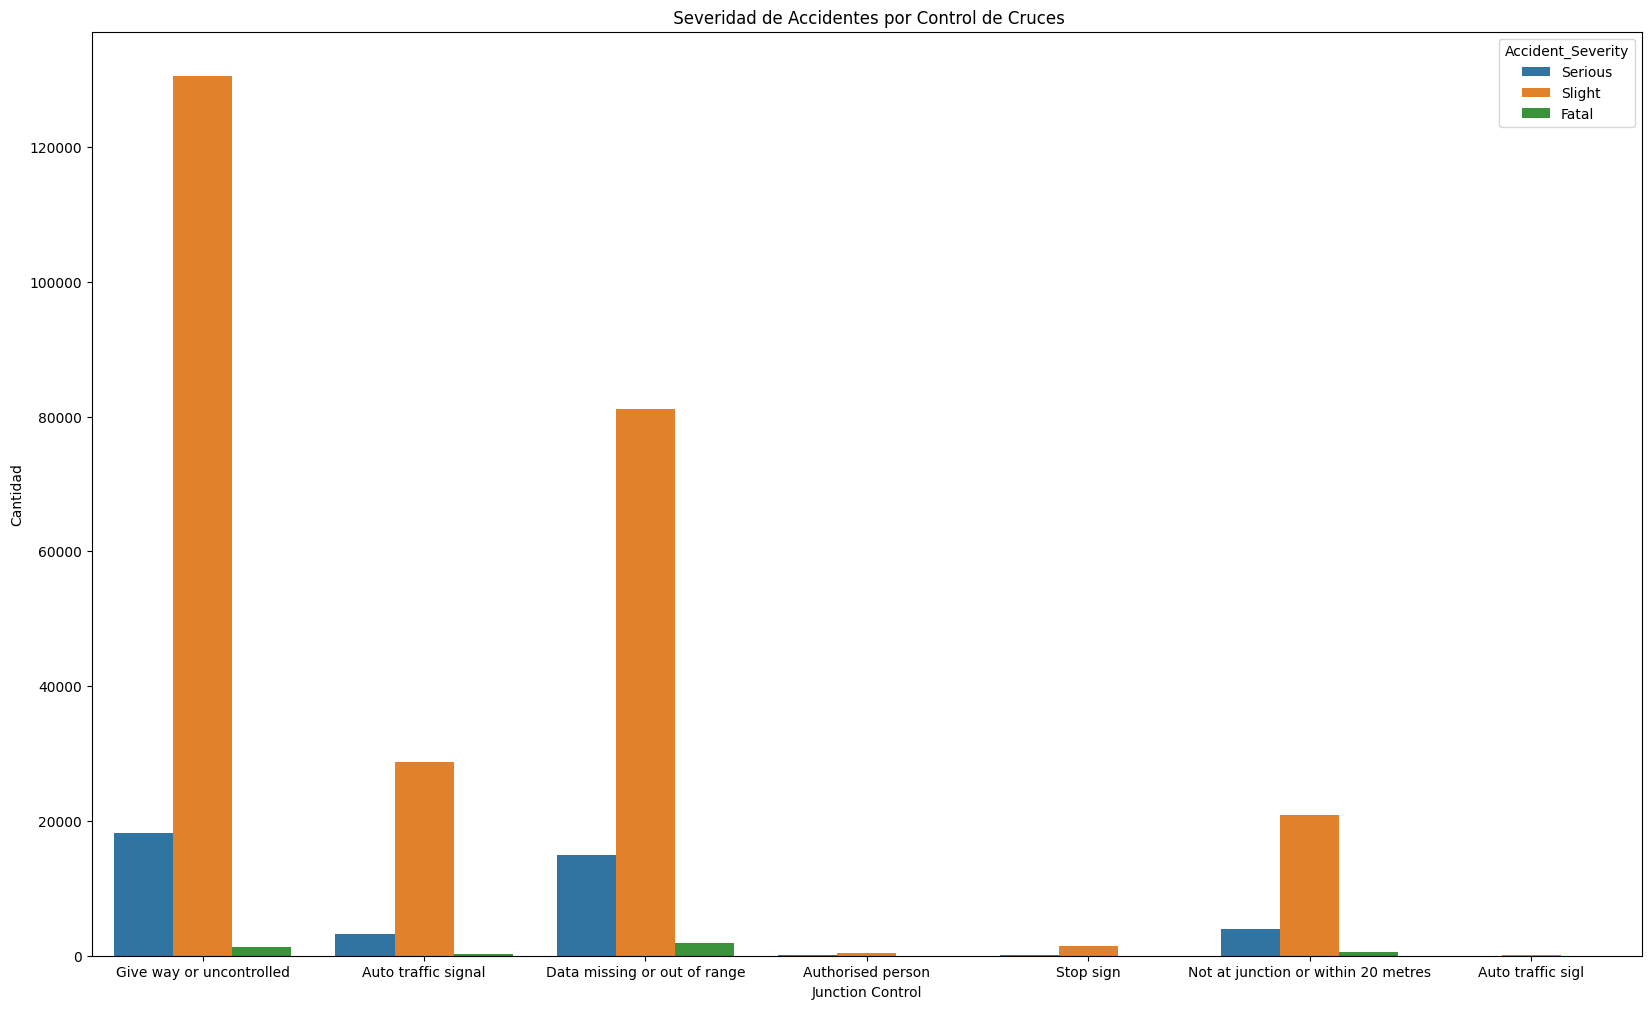

In [22]:
plt.figure(figsize=(20, 12))
sns.countplot(data = dataCarros, x = 'Junction_Control', hue = 'Accident_Severity')
plt.xlabel('Junction Control')
plt.ylabel('Cantidad')
plt.title(' Severidad de Accidentes por Control de Cruces')
plt.show()

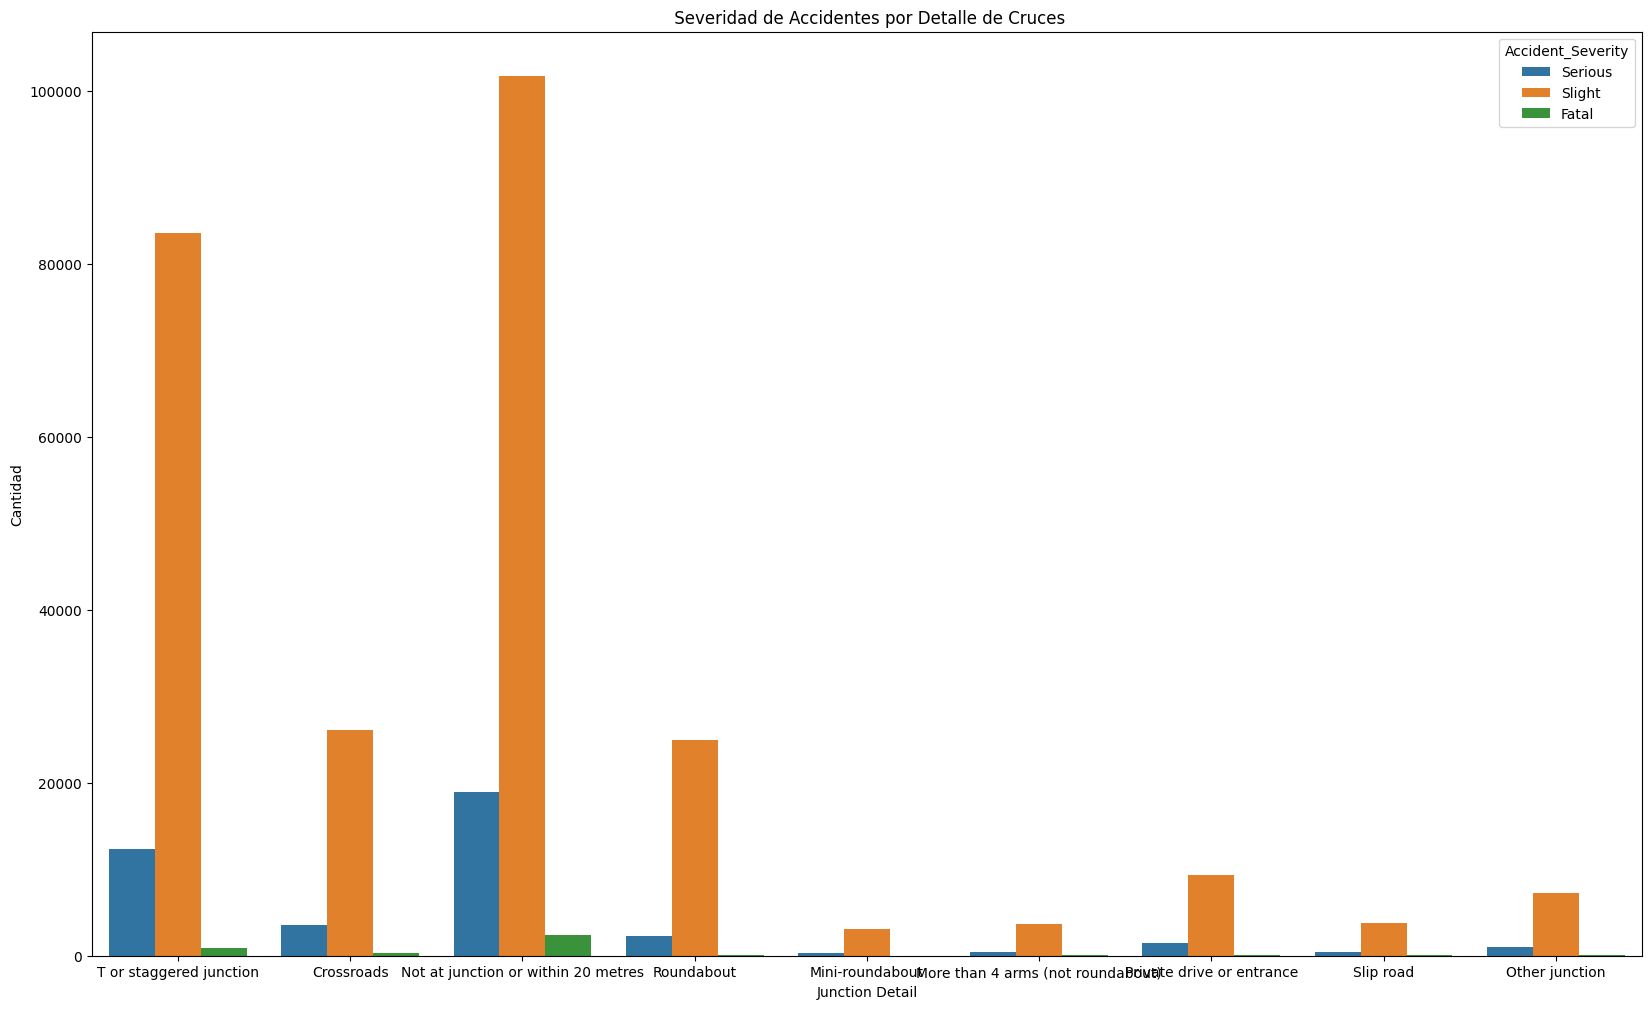

In [23]:
plt.figure(figsize=(20, 12))
sns.countplot(data = dataCarros, x = 'Junction_Detail', hue = 'Accident_Severity')
plt.xlabel('Junction Detail')
plt.ylabel('Cantidad')
plt.title(' Severidad de Accidentes por Detalle de Cruces')
plt.show()

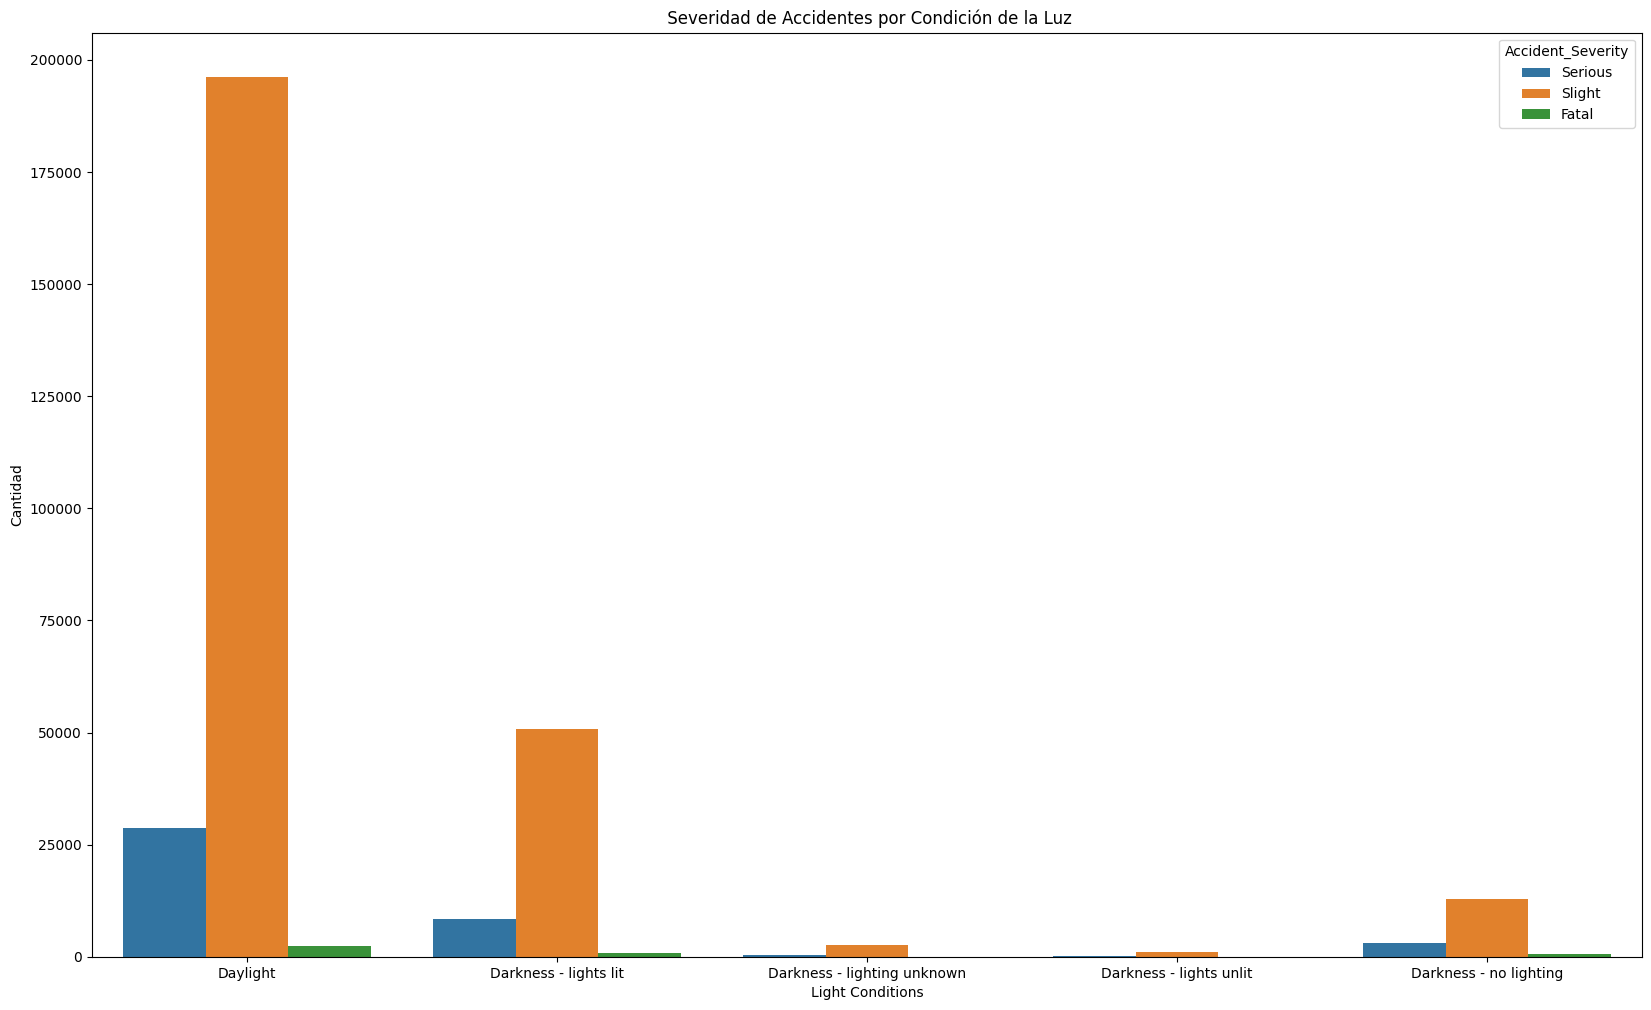

In [24]:
plt.figure(figsize=(20,12))
sns.countplot(data = dataCarros, x = 'Light_Conditions', hue = 'Accident_Severity')
plt.xlabel('Light Conditions')
plt.ylabel('Cantidad')
plt.title(' Severidad de Accidentes por Condición de la Luz')
plt.show()

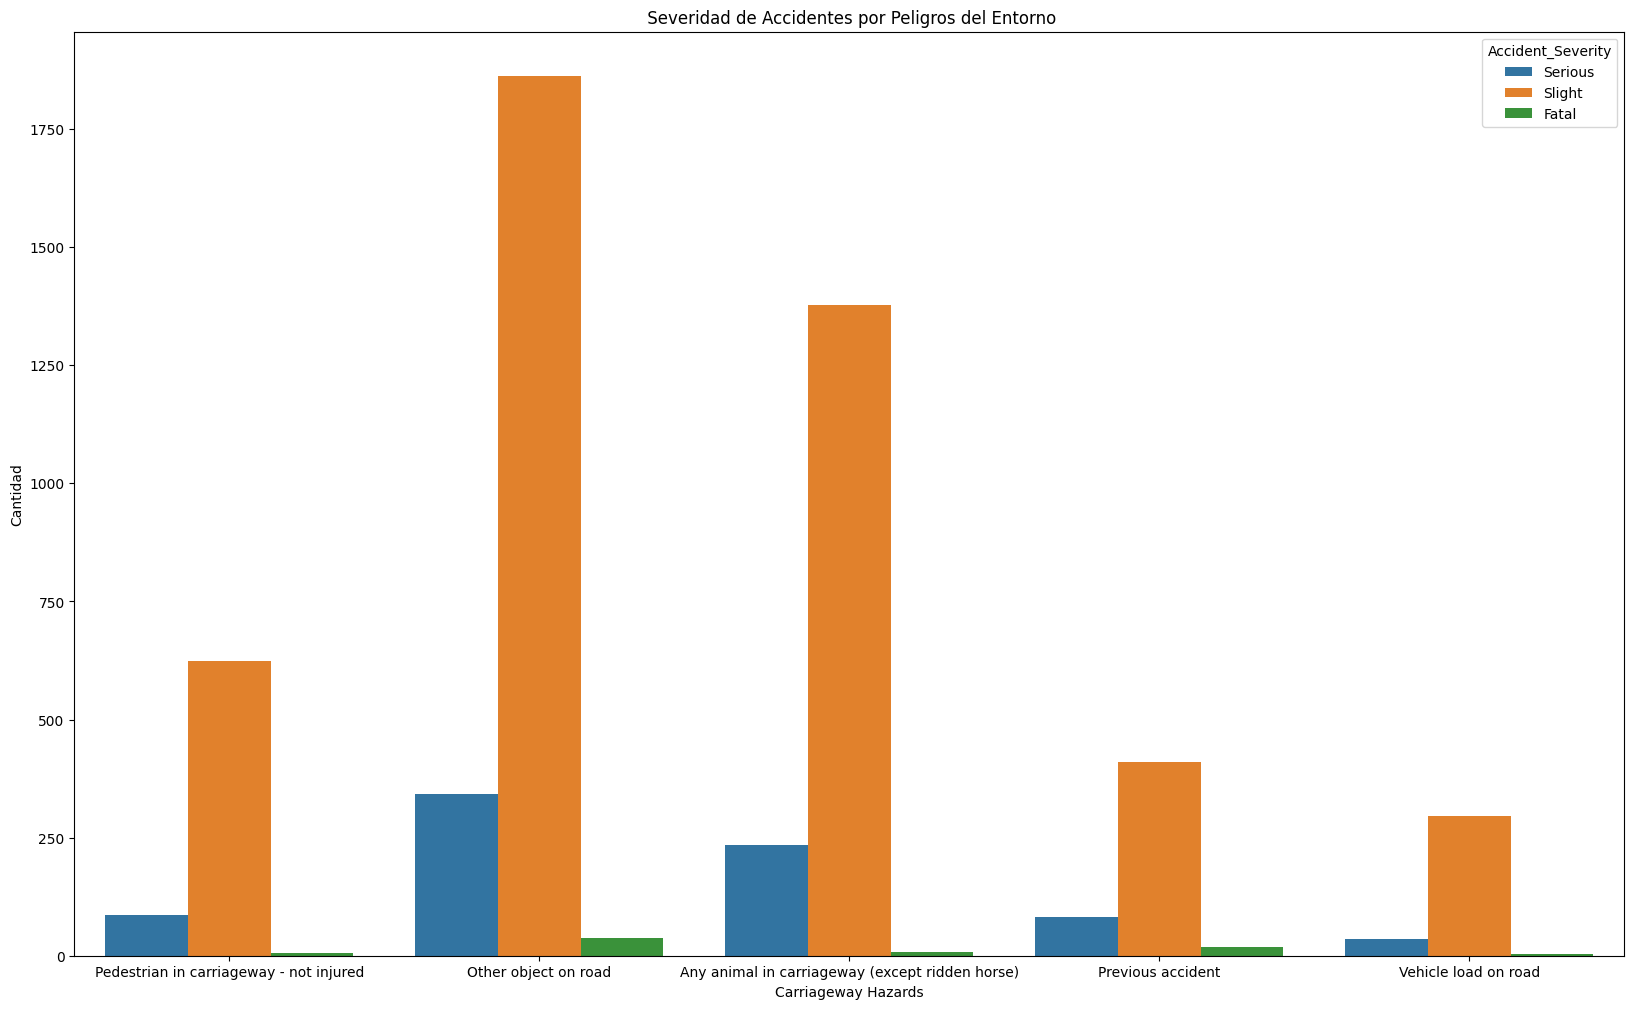

In [25]:
plt.figure(figsize=(20, 12))
sns.countplot(data = dataCarros, x = 'Carriageway_Hazards', hue = 'Accident_Severity')
plt.xlabel('Carriageway Hazards')
plt.ylabel('Cantidad')
plt.title(' Severidad de Accidentes por Peligros del Entorno')
plt.show()

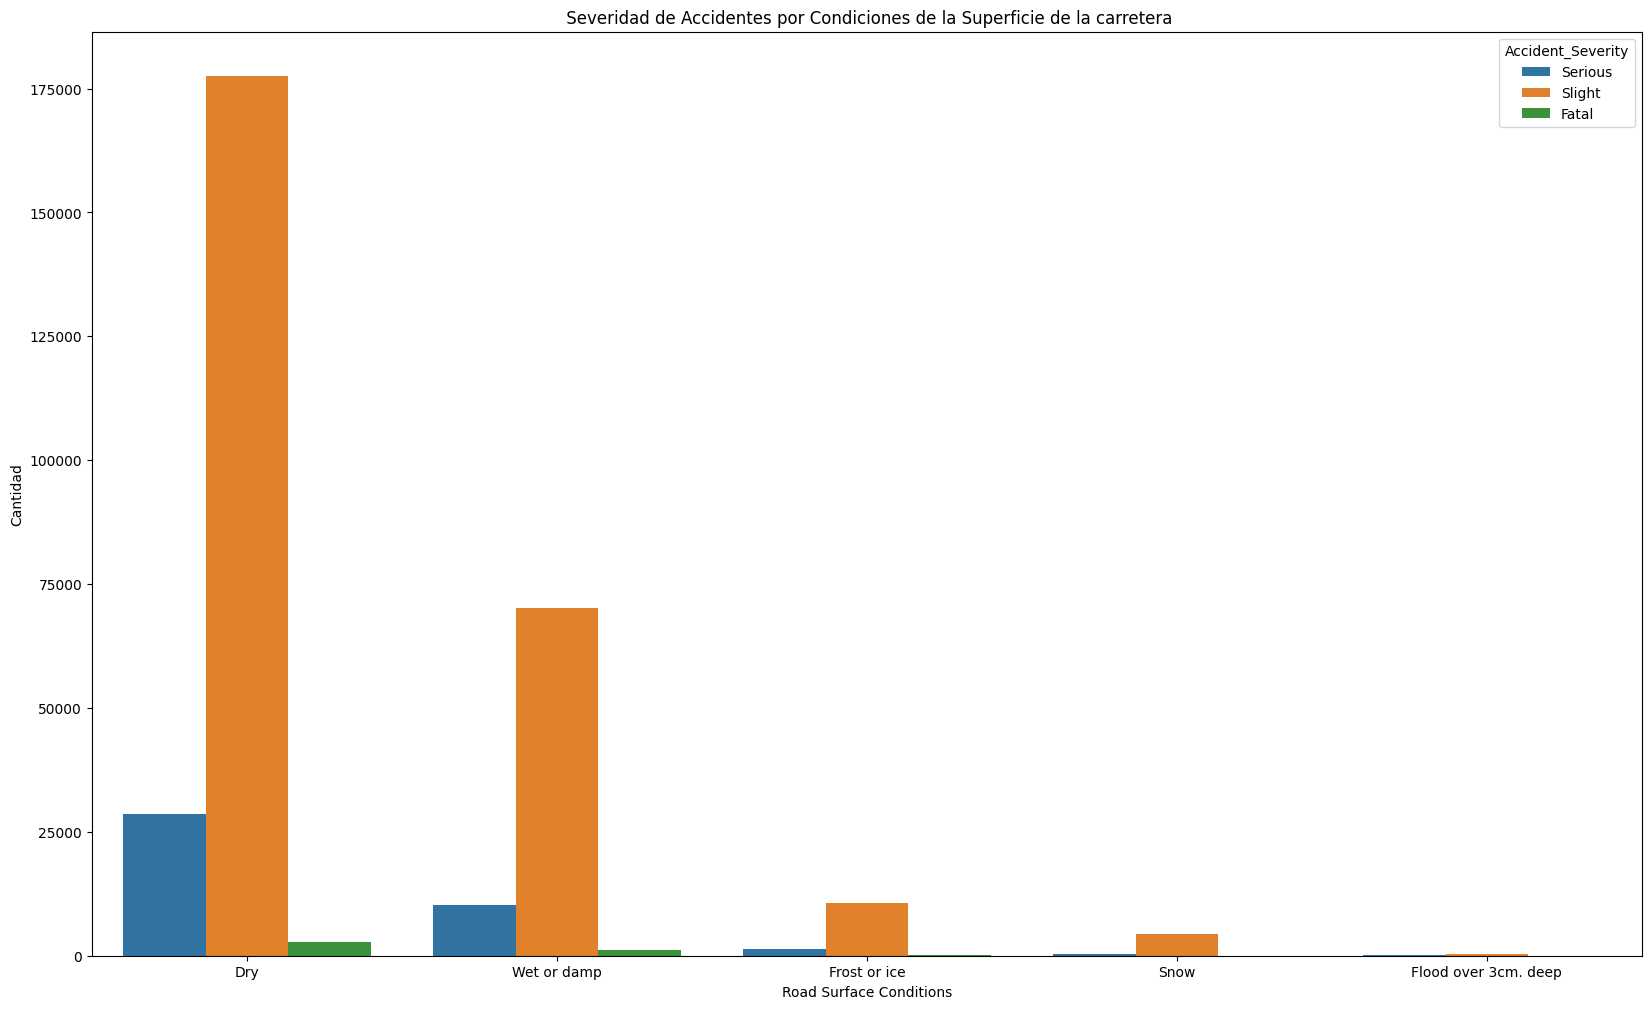

In [26]:
plt.figure(figsize=(20, 12))
sns.countplot(data = dataCarros, x = 'Road_Surface_Conditions', hue = 'Accident_Severity')
plt.xlabel('Road Surface Conditions')
plt.ylabel('Cantidad')
plt.title(' Severidad de Accidentes por Condiciones de la Superficie de la carretera')
plt.show()

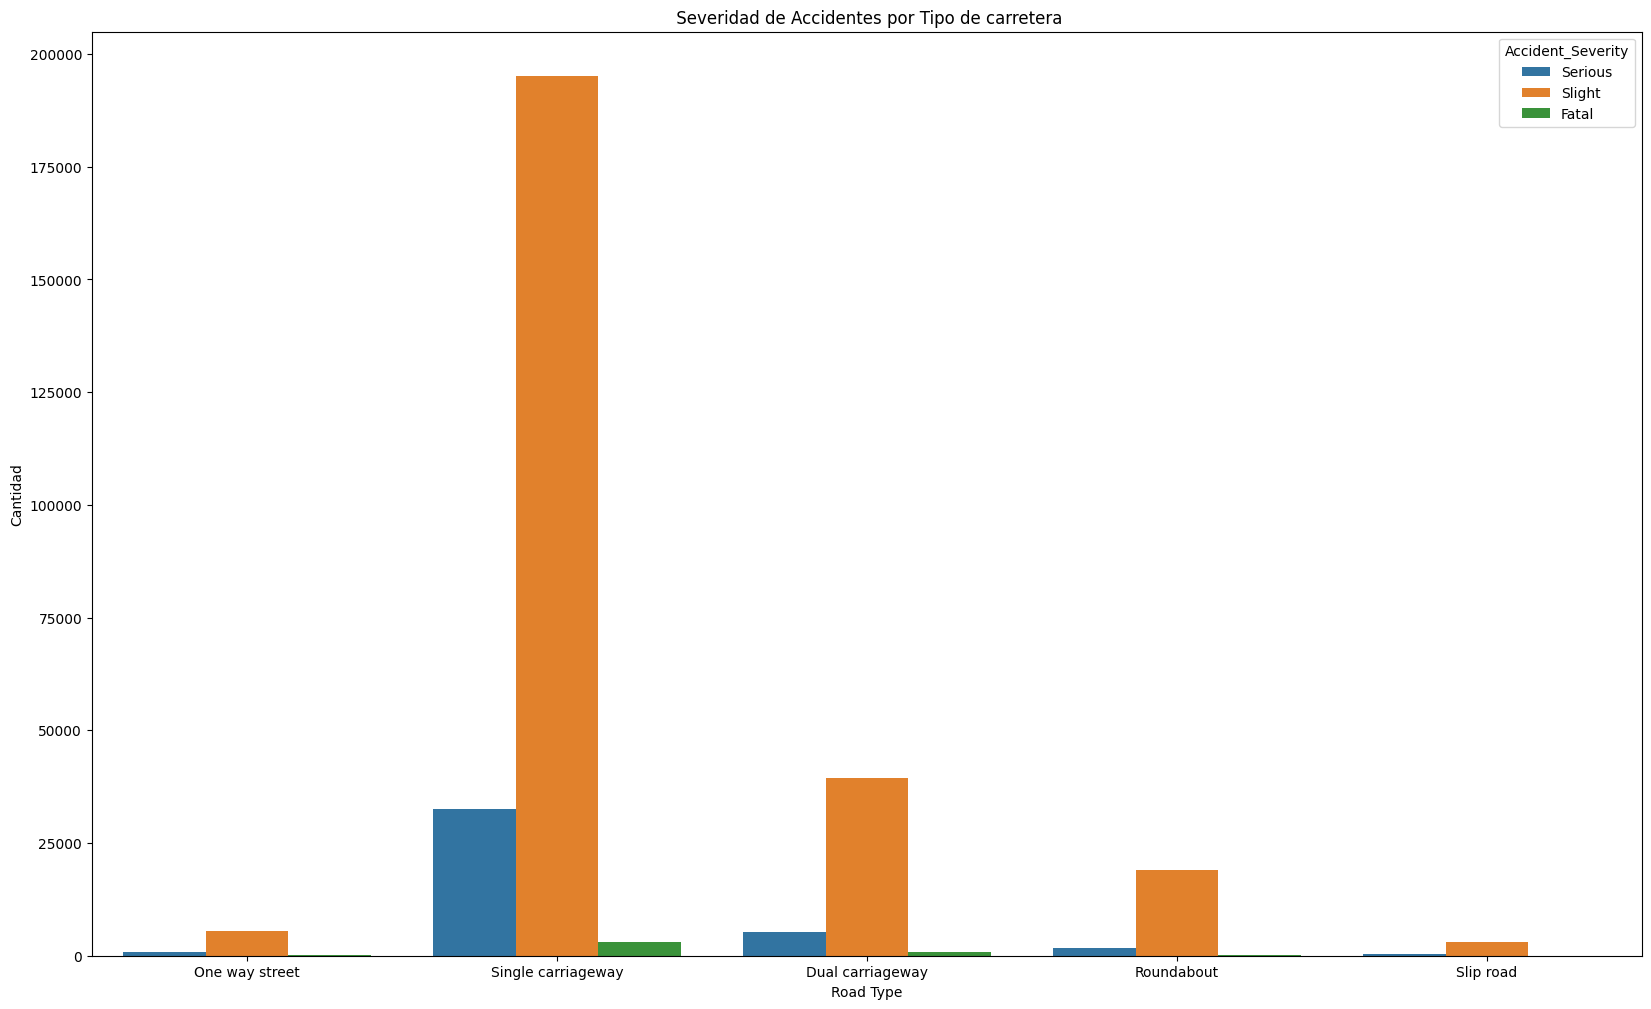

In [27]:
plt.figure(figsize=(20, 12))
sns.countplot(data = dataCarros, x = 'Road_Type', hue = 'Accident_Severity')
plt.xlabel('Road Type')
plt.ylabel('Cantidad')
plt.title(' Severidad de Accidentes por Tipo de carretera')
plt.show()

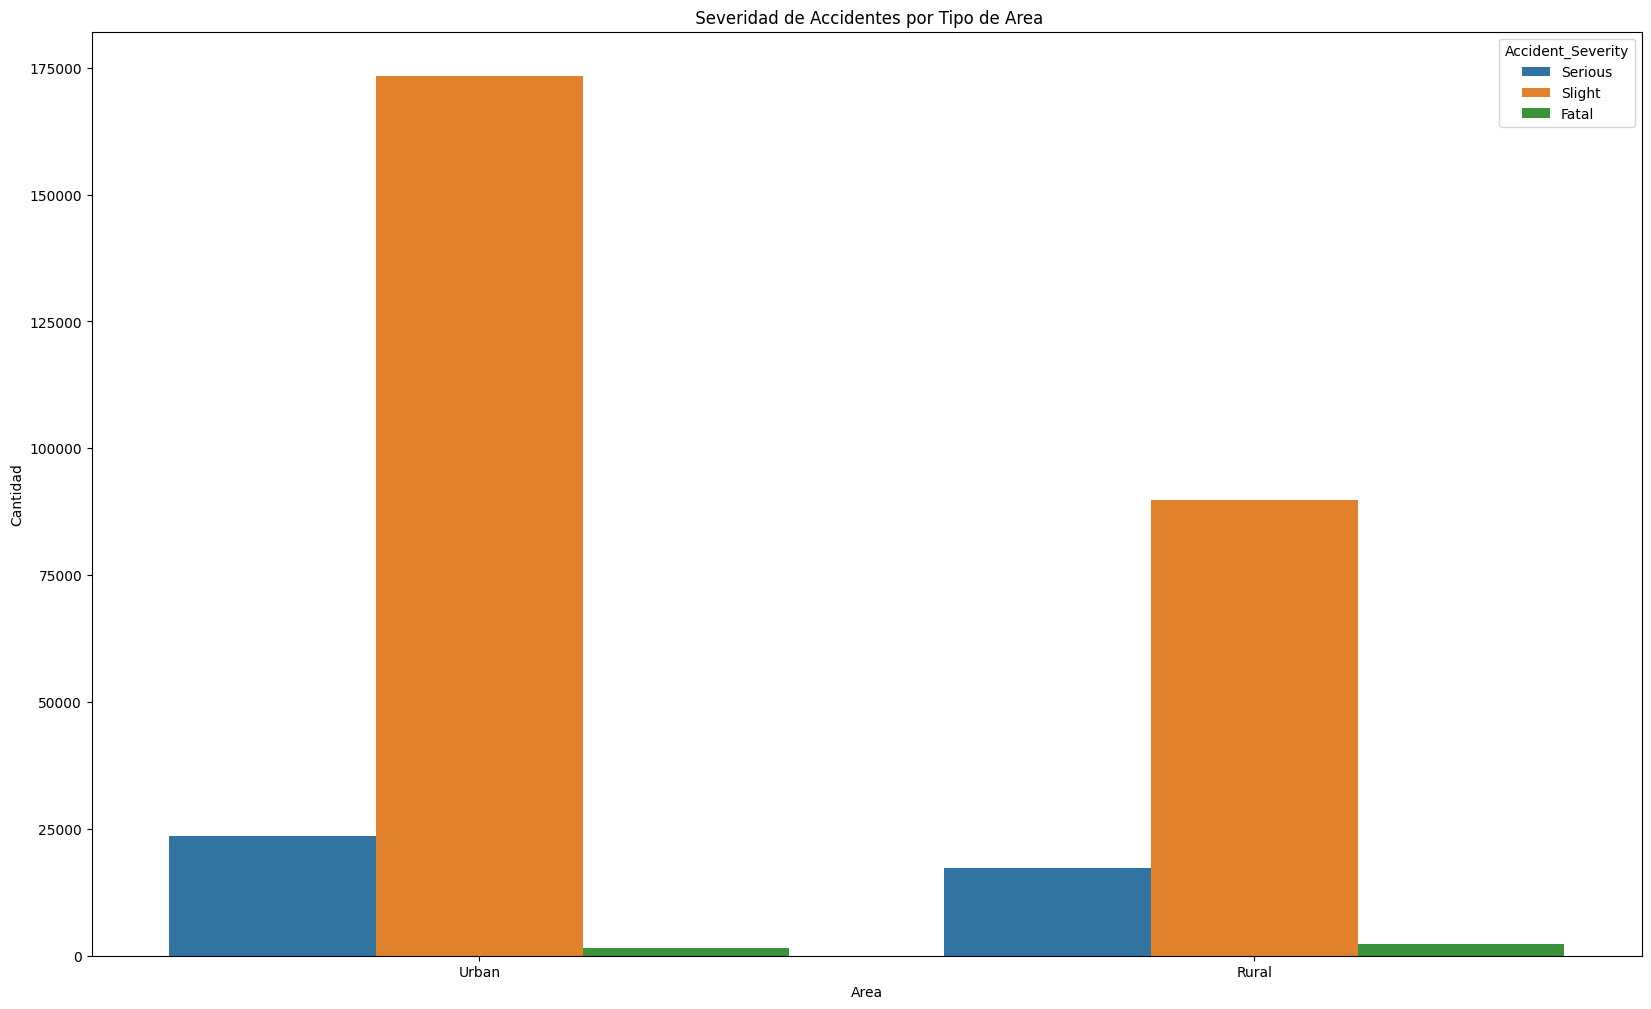

In [28]:
plt.figure(figsize=(20, 12))
sns.countplot(data = dataCarros, x = 'Urban_or_Rural_Area', hue = 'Accident_Severity')
plt.xlabel('Area')
plt.ylabel('Cantidad')
plt.title(' Severidad de Accidentes por Tipo de Area')
plt.show()

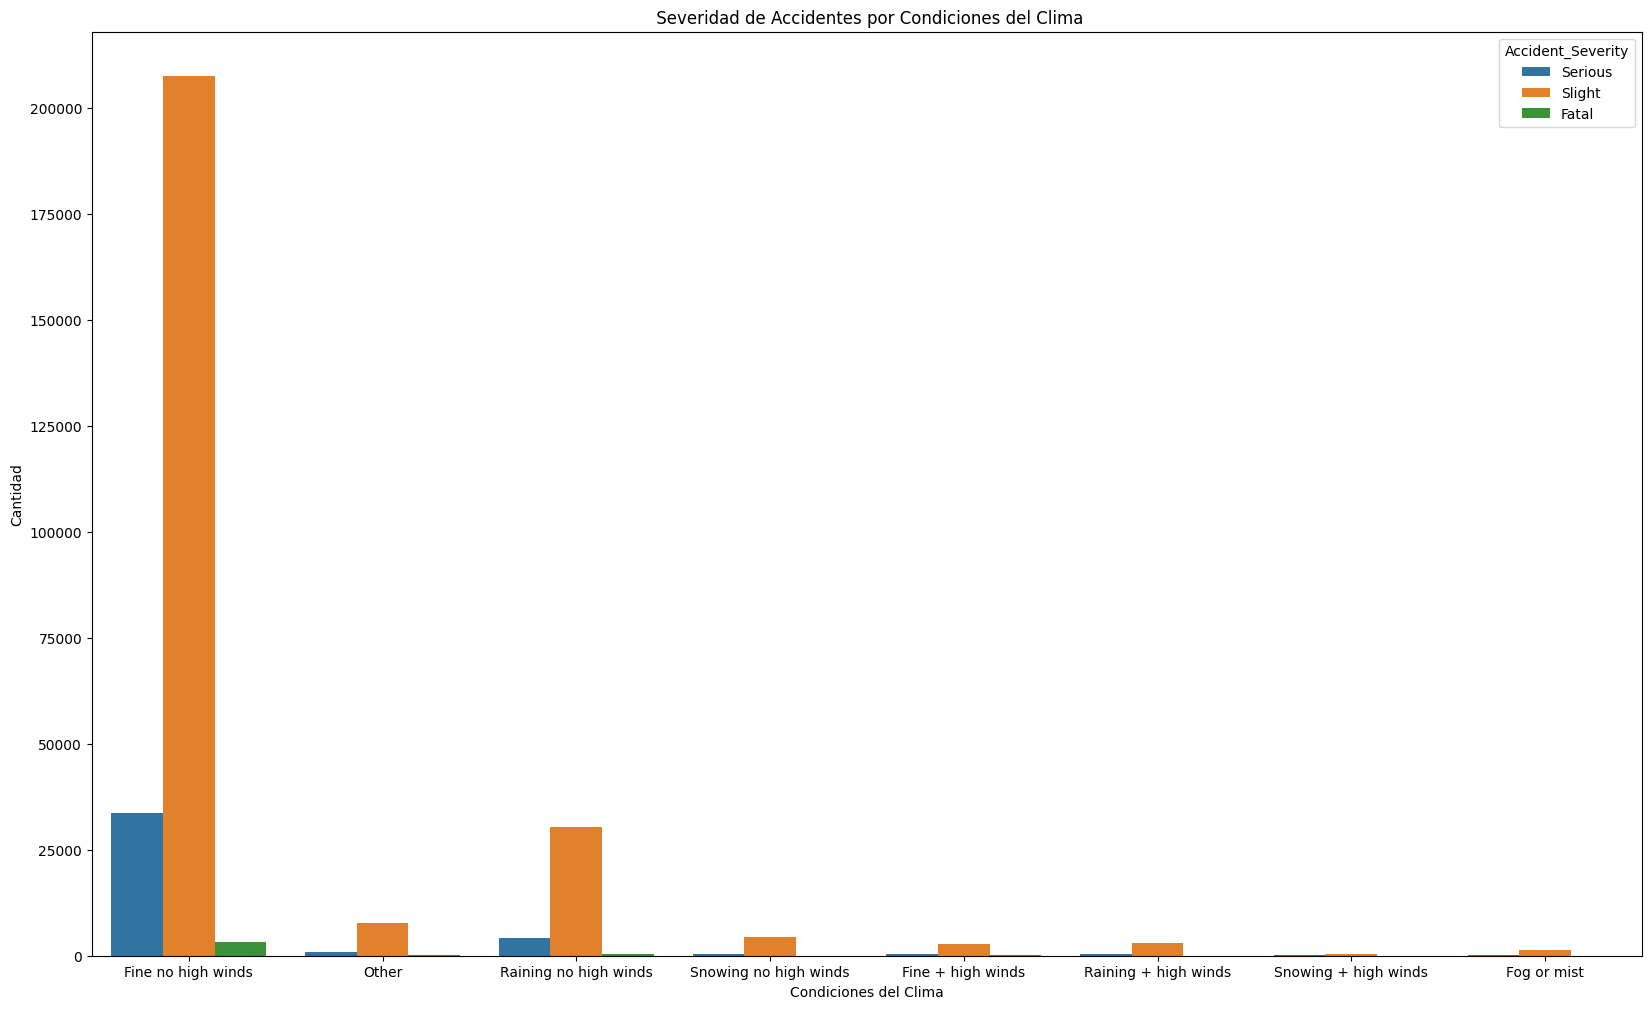

In [29]:
plt.figure(figsize=(20, 12))
sns.countplot(data = dataCarros, x = 'Weather_Conditions', hue = 'Accident_Severity')
plt.xlabel('Condiciones del Clima')
plt.ylabel('Cantidad')
plt.title(' Severidad de Accidentes por Condiciones del Clima')
plt.show()

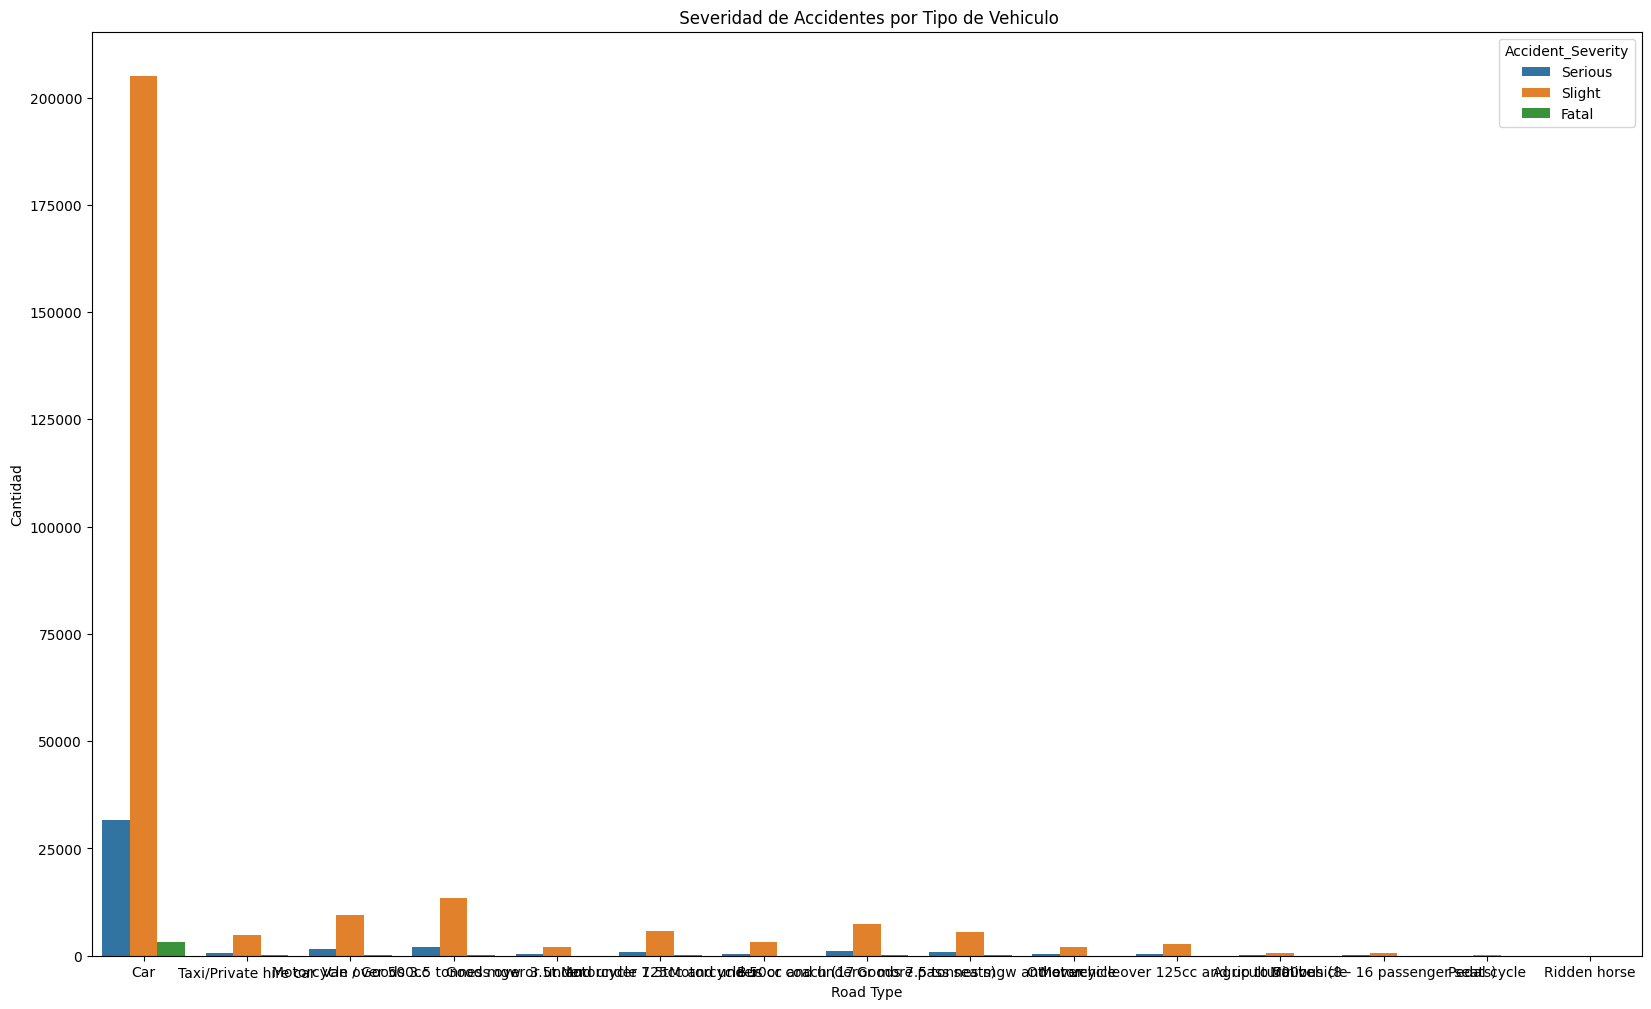

In [30]:
plt.figure(figsize=(20, 12))
sns.countplot(data = dataCarros, x = 'Vehicle_Type', hue = 'Accident_Severity')
plt.xlabel('Road Type')
plt.ylabel('Cantidad')
plt.title(' Severidad de Accidentes por Tipo de Vehiculo')
plt.show()

### **Análisis descriptivo de variables numéricas**

In [31]:
#Descripción de variables numéricas
dataCarros.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles,Speed_limit
count,307973.000000,307973.000000,307973.000000,307973.000000,307973.000000
mean,52.487005,-1.368884,1.356882,1.829063,38.866037
std,1.339011,1.356092,0.815857,0.710477,14.032933
min,49.914488,-7.516225,1.000000,1.000000,10.000000
25%,51.485248,-2.247937,1.000000,1.000000,30.000000
50%,52.225943,-1.349258,1.000000,2.000000,30.000000
75%,53.415517,-0.206810,1.000000,2.000000,50.000000
max,60.598055,1.759398,48.000000,32.000000,70.000000


<Axes: >

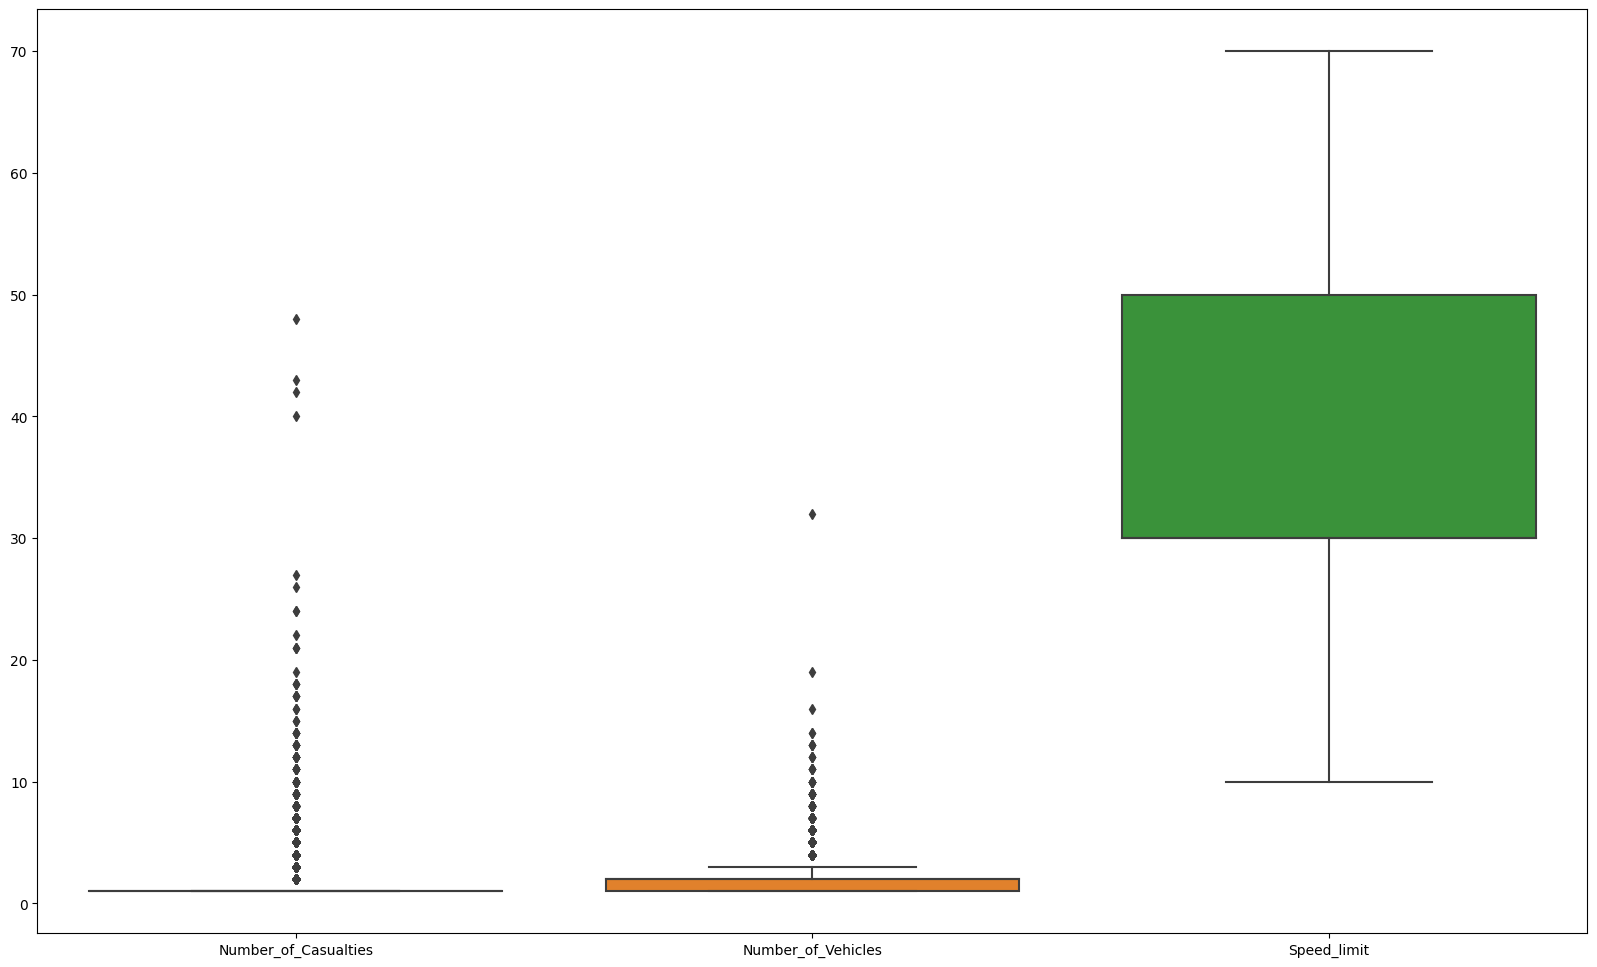

In [32]:
plt.figure(figsize=(20,12))
dataCarros_n = ['Number_of_Casualties','Number_of_Vehicles','Speed_limit']
sns.boxplot(data = dataCarros[dataCarros_n])

## **Ajuste de Tipos de Variables**

Después de la descripción de los datos, identificamos algunos datos como innecesarios para el análisis predictivo por lo que buscamos la eliminación de dichos campos (los cuales no aportan un valor significativo, pues brindan una cantidad demasiado variable de valores por campo o datos que se descartan directamente un posible accidente de tránsito). De esta forma, eliminamos los campos: *Junction_Control, Junction_Detail Local_Authority_(District), Police_Force, Time, Vehicle_Type*.

In [33]:
# Eliminar las columnas especificadas
dataCarros = dataCarros.drop(columns=['Junction_Control', 'Junction_Detail', 'Local_Authority_(District)', 'Police_Force', 'Time', 'Vehicle_Type'])

Debido a la identificación del campo de Latitud y Longitud, tampoco aportan un valor significativo de acuerdo con su posición, en tal situación, sería aprovechable la determinación por zona de evaluación. Por ello, dichos campos son eliminados: *Latitude, Longitude.*

In [34]:
# Eliminar las columnas especificadas
dataCarros = dataCarros.drop(columns=['Latitude','Longitude'])

In [35]:
#Mostramos la versión final del dataset luego de la limpieza de datos
dataCarros

,Accident_Index,Accident Date,Day_of_Week,Accident_Severity,Light_Conditions,Carriageway_Hazards,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Speed_limit,Urban_or_Rural_Area,Weather_Conditions
0,200901BS70001,1/1/2021,Thursday,Serious,Daylight,NaN,1,2,Dry,One way street,30,Urban,Fine no high winds
1,200901BS70002,1/5/2021,Monday,Serious,Daylight,NaN,11,2,Wet or damp,Single carriageway,30,Urban,Fine no high winds
2,200901BS70003,1/4/2021,Sunday,Slight,Daylight,NaN,1,2,Dry,Single carriageway,30,Urban,Fine no high winds
3,200901BS70004,1/5/2021,Monday,Serious,Daylight,NaN,1,2,Frost or ice,Single carriageway,30,Urban,Other
4,200901BS70005,1/6/2021,Tuesday,Serious,Darkness - lights lit,NaN,1,2,Dry,Single carriageway,30,Urban,Fine no high winds
...,...,...,...,...,...,...,...,...,...,...,...,...,...
307968,201091NM01760,2/18/2022,Thursday,Slight,Daylight,NaN,2,1,Dry,Single carriageway,60,Rural,Fine no high winds
307969,201091NM01881,2/21/2022,Sunday,Slight,Darkness - no lighting,NaN,1,1,Frost or ice,Single carriageway,60,Rural,Fine no high winds
307970,201091NM01935,2/23/2022,Tuesday,Slight,Daylight,NaN,1,3,Frost or ice,Single carriageway,30,Rural,Fine no high winds
307971,201091NM01964,2/23/2022,Tuesday,Serious,Darkness - no lighting,NaN,1,2,Wet or damp,Single carriageway,60,Rural,Fine no high winds


## **Detección y tratamiento de datos ausentes**

In [36]:
print('Detección de valores vacíos en el dataset dataCarros: \n')
print(dataCarros.isna().sum())

Detección de valores vacíos en el dataset dataCarros: 

Accident_Index                  0
Accident Date                   0
Day_of_Week                     0
Accident_Severity               0
Light_Conditions                0
Carriageway_Hazards        302549
Number_of_Casualties            0
Number_of_Vehicles              0
Road_Surface_Conditions       317
Road_Type                    1534
Speed_limit                     0
Urban_or_Rural_Area             0
Weather_Conditions           6057
dtype: int64


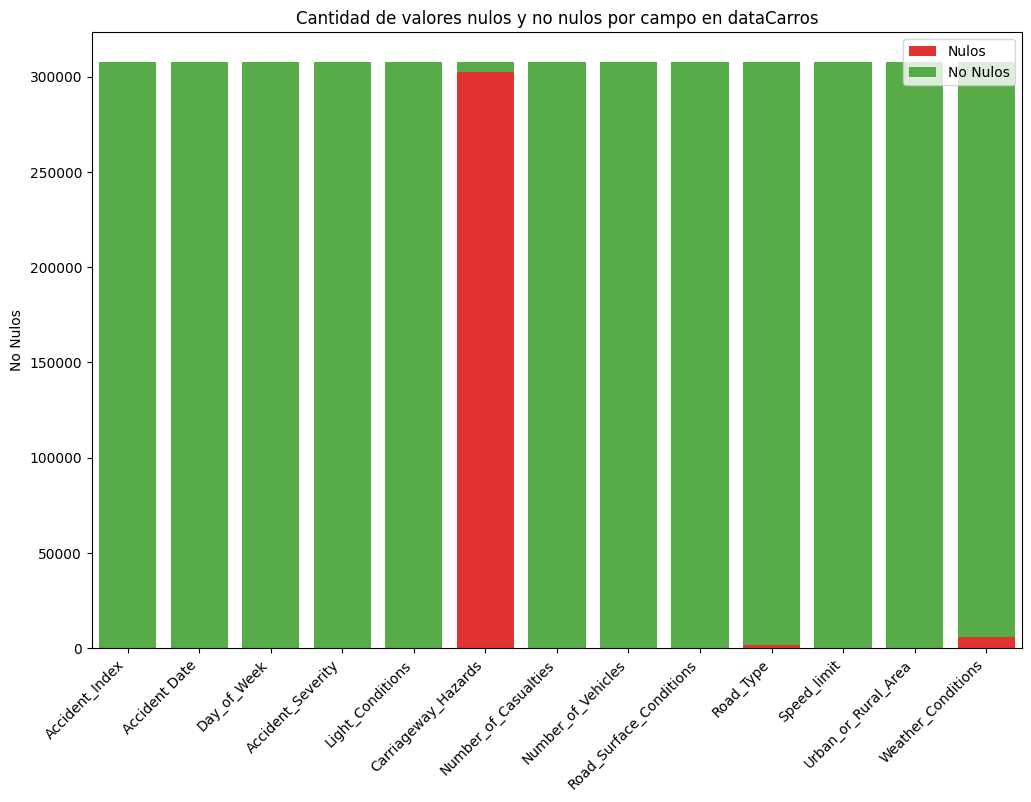

In [37]:
# Calcular la cantidad total de registros en el dataset
total_registros = len(dataCarros)

# Obtener el número de valores nulos y no nulos por cada campo
valores_nulos = dataCarros.isna().sum()
valores_no_nulos = total_registros - valores_nulos

# Crear un DataFrame para facilitar el uso de Seaborn
df = pd.DataFrame({'Nulos': valores_nulos, 'No Nulos': valores_no_nulos})

# Crear una gráfica de barras apiladas
plt.figure(figsize=(12, 8))
sns.barplot(x=df.index, y=df['Nulos'], color='#FF1616', label='Nulos')
sns.barplot(x=df.index, y=df['No Nulos'], bottom=df['Nulos'], color='#4BBC39', label='No Nulos')

# Configurar el título y las etiquetas del eje
plt.title('Cantidad de valores nulos y no nulos por campo en dataCarros')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor legibilidad

# Mostrar la leyenda
plt.legend()

# Mostrar la gráfica
plt.show()

## **Identificación de datos atípicos**

In [38]:
cantidadTotal = len(dataCarros)

#Determinar la cantidad de valores atipicos de acuerdo a las variables numéricas
for i in dataCarros_n:
    Q1 = dataCarros[i].quantile(0.25)
    Q3 = dataCarros[i].quantile(0.75)

    RIC = Q3 - Q1

    limite_superior = Q3 + 1.5*RIC
    limite_inferior = Q1 - 1.5*RIC
    
    valores_atipicos = dataCarros[(dataCarros[i] < limite_inferior) | (dataCarros[i] > limite_superior)]
    cantidad_outliers = len(valores_atipicos)
    porcentaje_atipicos = 100*cantidad_outliers/cantidadTotal
    
    print('\nCantidad de valores atípicos de la variable ', i ,f' es:  {cantidad_outliers}')
    print('Cantidad de valores totales de la variable ', i ,f' es:  {cantidadTotal}')
    print('Porcentaje de valores atípicos de la variable ', i ,' es:  {:.3f}%'.format(porcentaje_atipicos))


Cantidad de valores atípicos de la variable  Number_of_Casualties  es:  72880
Cantidad de valores totales de la variable  Number_of_Casualties  es:  307973
Porcentaje de valores atípicos de la variable  Number_of_Casualties  es:  23.664%

Cantidad de valores atípicos de la variable  Number_of_Vehicles  es:  6803
Cantidad de valores totales de la variable  Number_of_Vehicles  es:  307973
Porcentaje de valores atípicos de la variable  Number_of_Vehicles  es:  2.209%

Cantidad de valores atípicos de la variable  Speed_limit  es:  0
Cantidad de valores totales de la variable  Speed_limit  es:  307973
Porcentaje de valores atípicos de la variable  Speed_limit  es:  0.000%


## **Correlación de variables**

<Axes: >

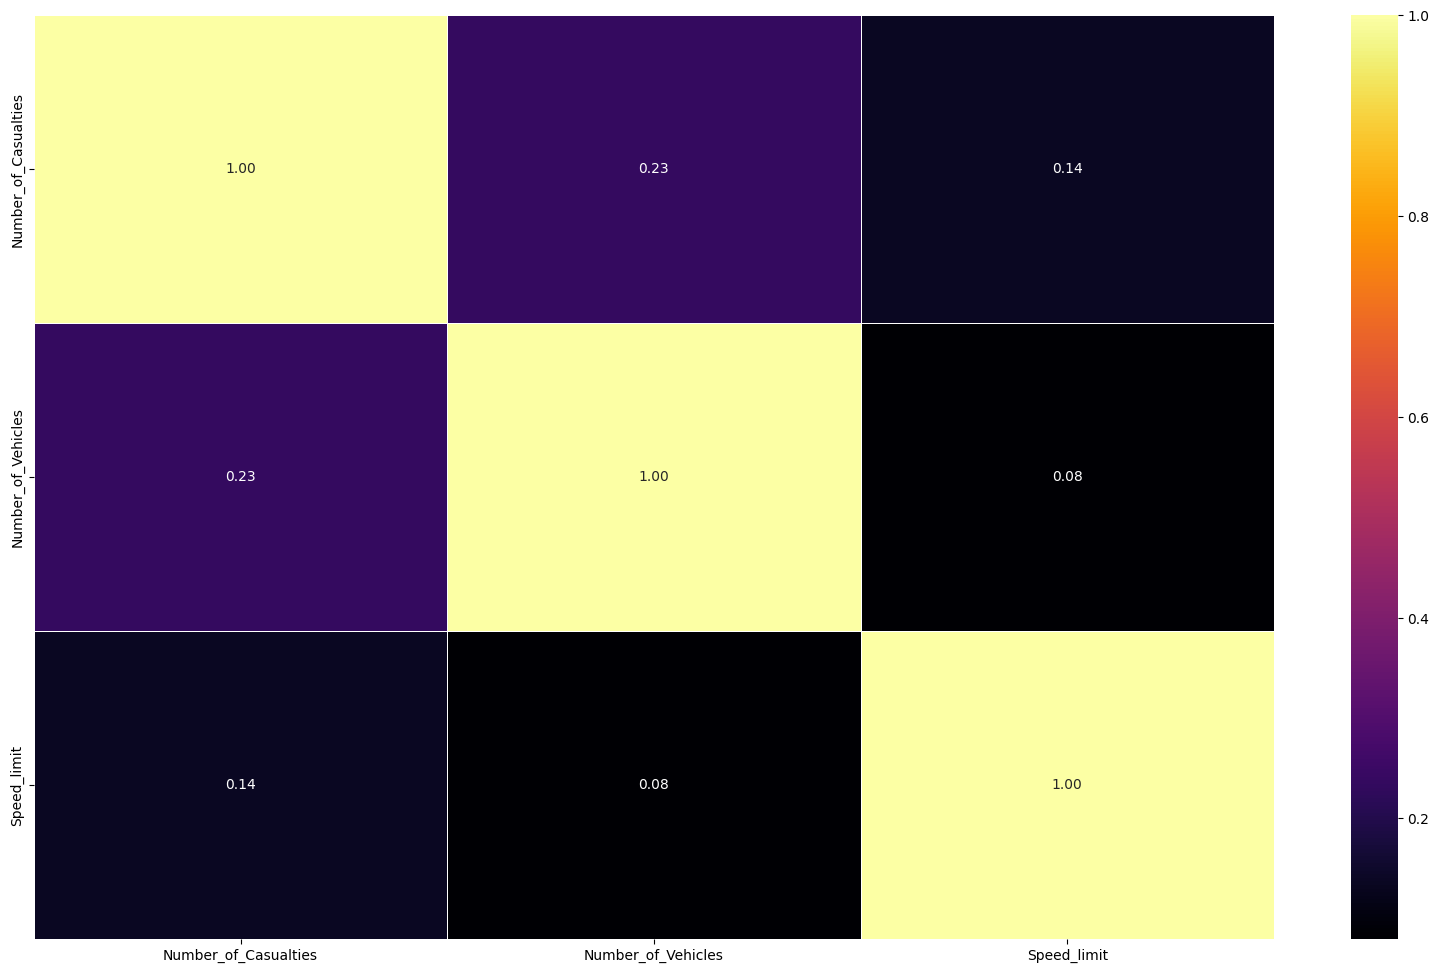

In [39]:
plt.figure(figsize=(20,12))
correlacion_data = dataCarros[dataCarros_n].corr()
sns.heatmap(correlacion_data , annot=True, cmap='inferno', fmt=".2f", linewidths=.5)

# **Pre-Procesamiento de datos**

## **Imputación de Missing Values**

Haremos uso de las técnicas de imputación más complejas de Missing Values, K-Nearest Neighbor, un algoritmo de Machine Learning que nos permite estimar los valores faltantes en nuestro conjunto de datos al identificar y utilizar las observaciones vecinas más cercanas. Esta estrategia se basa en la premisa de que las instancias similares tienden a tener valores similares, lo que nos permite inferir los datos faltantes de manera más precisa. Al emplear el enfoque de K-Nearest Neighbor, buscamos mejorar la integridad y la calidad de nuestros datos, contribuyendo así a un análisis más robusto y fiable.

In [40]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer

import warnings
warnings.filterwarnings("ignore")

In [41]:
# Seleccionar solo las columnas con valores faltantes
MissingValues = ['Carriageway_Hazards', 'Road_Surface_Conditions', 'Road_Type', 'Weather_Conditions']
data_faltante = dataCarros[MissingValues]

In [42]:
# Crear un codificador one-hot
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [43]:
# Codificar las variables categóricas
data_faltante_encoded = encoder.fit_transform(data_faltante.astype(str))

In [44]:
# Imputar los valores faltantes usando KNN
imputador_knn = KNNImputer(n_neighbors=5)  # Puedes ajustar el valor de n_neighbors según sea necesario
data_imputada_encoded = imputador_knn.fit_transform(data_faltante_encoded)

In [45]:
# Revertir la codificación one-hot
data_imputada = pd.DataFrame(encoder.inverse_transform(data_imputada_encoded), columns=MissingValues)

# Reemplazar las columnas imputadas en el DataFrame original
dataCarros[MissingValues] = data_imputada

In [46]:
# Verificar que ya no hay valores faltantes
print(dataCarros.isnull().sum())

Accident_Index             0
Accident Date              0
Day_of_Week                0
Accident_Severity          0
Light_Conditions           0
Carriageway_Hazards        0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Speed_limit                0
Urban_or_Rural_Area        0
Weather_Conditions         0
dtype: int64


## **Conversión de variables**

In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
dataCarros_categoricos = ['Accident_Index','Accident Date','Day_of_Week', 'Accident_Severity', 'Light_Conditions', 'Carriageway_Hazards',
                        'Road_Surface_Conditions', 'Road_Type', 'Urban_or_Rural_Area', 'Weather_Conditions']

In [49]:
# Inicializa el LabelEncoder
label_encoder = LabelEncoder()

In [50]:
# Aplica Label Encoding a cada columna categórica
for column in dataCarros_categoricos:
    dataCarros[column + '_encoded'] = label_encoder.fit_transform(dataCarros[column])

In [51]:
# Elimina las columnas originales si es necesario
dataCarros = dataCarros.drop(dataCarros_categoricos, axis=1)

In [52]:
# Visualiza el nuevo DataFrame
print(dataCarros)

        Number_of_Casualties  Number_of_Vehicles  Speed_limit  \
0                          1                   2           30   
1                         11                   2           30   
2                          1                   2           30   
3                          1                   2           30   
4                          1                   2           30   
...                      ...                 ...          ...   
307968                     2                   1           60   
307969                     1                   1           60   
307970                     1                   3           30   
307971                     1                   2           60   
307972                     1                   1           60   

        Accident_Index_encoded  Accident Date_encoded  Day_of_Week_encoded  \
0                          148                      0                    4   
1                          149                     52          

In [53]:
dataCarros = dataCarros.drop(columns = ['Accident_Index_encoded'])

<Axes: >

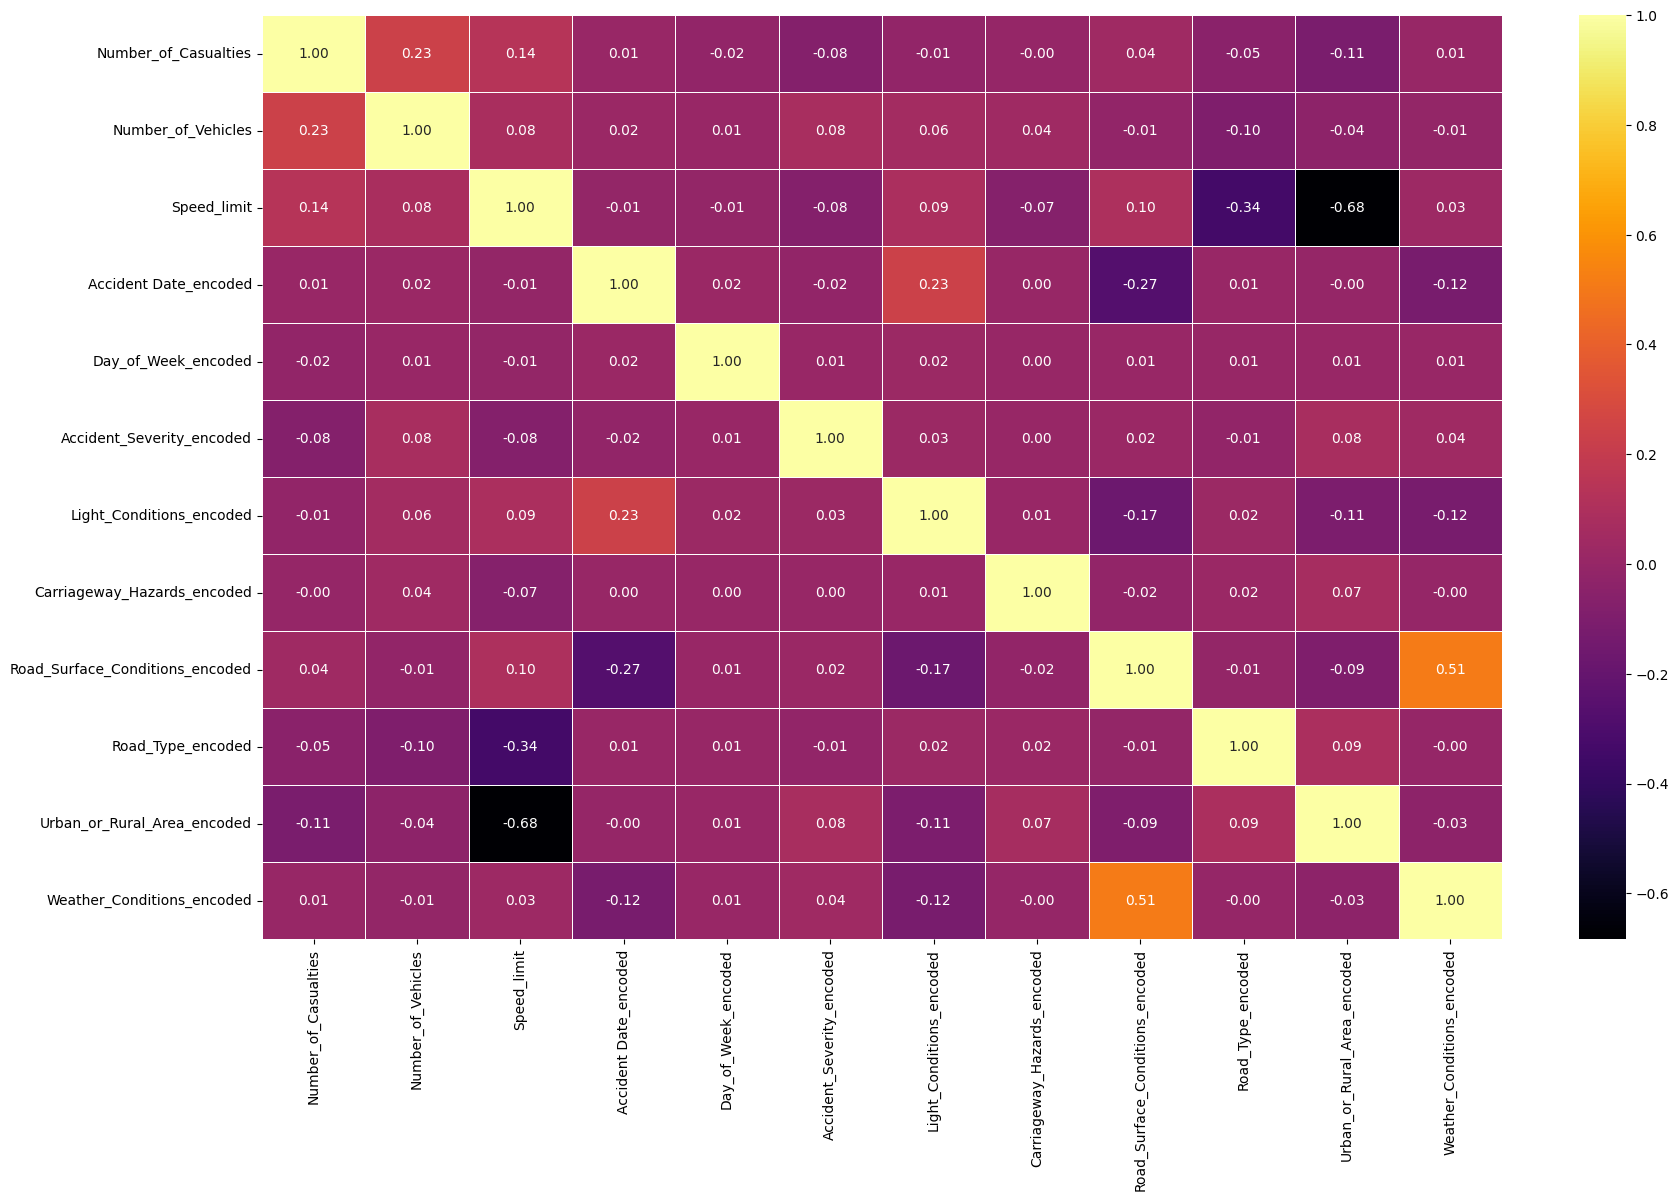

In [54]:
plt.figure(figsize=(20,12))
correlacion_data = dataCarros.corr()
sns.heatmap(correlacion_data , annot=True, cmap='inferno', fmt=".2f", linewidths=.5)

## **División del dataset**

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
#Definimos la variable dependiente e independientes
y = dataCarros['Accident_Severity_encoded']
X = dataCarros.drop(columns = ['Accident_Severity_encoded'])

In [57]:
#Separamos el conjunto de datos en un 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [58]:
#Validamos la cantidad de entrenamiento y testeo
cant_train = len(X_train)
cant_test = len(X_test)
total = cant_train + cant_test

print("Cantidad de datos de entrenamiento:", cant_train)
print('Porcentaje de datos de entrenamiento: {:.2f}%'.format(100*cant_train/total))

print("\nCantidad de datos de prueba:", len(X_test))
print('Porcentaje de datos de prueba: {:.2f}%'.format(100*cant_test/total))

Cantidad de datos de entrenamiento: 246378
Porcentaje de datos de entrenamiento: 80.00%

Cantidad de datos de prueba: 61595
Porcentaje de datos de prueba: 20.00%


# **Implementación de Algoritmos de Machine Learning**

## **Regresión Logística**

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [60]:
# Escalamos las variables independientes para mejorar el rendimiento del modelo
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [61]:
# Creamos el modelo de regresión logística
logistic_model = LogisticRegression()

In [62]:
# Entrenamos el modelo
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [63]:
# Realizamos predicciones en el conjunto de prueba
y_pred = logistic_model.predict(X_test_scaled)
y_pred_logistic = y_pred

In [64]:
# Evaluamos el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [65]:
# Imprimimos las métricas de rendimiento
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8555


In [66]:
print('Confusion Matrix:\n', confusion_mat)

Confusion Matrix:
 [[    1     1   806]
 [    1     4  8081]
 [    2     7 52692]]


In [67]:
print('Classification Report:\n', classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.00      0.00       808
           1       0.33      0.00      0.00      8086
           2       0.86      1.00      0.92     52701

    accuracy                           0.86     61595
   macro avg       0.48      0.33      0.31     61595
weighted avg       0.78      0.86      0.79     61595



## **Algoritmo de Máquina de Soporte Vectorial para Clasificación**

In [68]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [69]:
# Escalamos las variables independientes para mejorar el rendimiento del modelo
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [70]:
# Creamos el modelo de Máquinas de Soporte Vectorial
svm_model = SVC(kernel='linear', random_state=42)

In [71]:
# Entrenamos el modelo
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

In [72]:
# Realizamos predicciones en el conjunto de prueba
y_pred = svm_model.predict(X_test_scaled)
y_pred_svm = y_pred

In [73]:
# Evaluamos el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [74]:
# Imprimimos las métricas de rendimiento
print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:\n', confusion_mat)
print('Classification Report:\n', classification_rep)

Accuracy: 0.8556
Confusion Matrix:
 [[    0     0   808]
 [    0     0  8086]
 [    0     0 52701]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       808
           1       0.00      0.00      0.00      8086
           2       0.86      1.00      0.92     52701

    accuracy                           0.86     61595
   macro avg       0.29      0.33      0.31     61595
weighted avg       0.73      0.86      0.79     61595



## **Random Forest**

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
# Creamos el modelo de Random Forest
random_forest_model = RandomForestClassifier(random_state=42)

In [77]:
# Entrenamos el modelo
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [78]:
# Realizamos predicciones en el conjunto de prueba
y_pred = random_forest_model.predict(X_test)
y_pred_rf = y_pred

In [79]:
# Evaluamos el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [80]:
# Imprimimos las métricas de rendimiento
print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:\n', confusion_mat)
print('Classification Report:\n', classification_rep)

Accuracy: 0.8277
Confusion Matrix:
 [[    4    84   720]
 [   59   601  7426]
 [  167  2157 50377]]
Classification Report:
               precision    recall  f1-score   support

           0       0.02      0.00      0.01       808
           1       0.21      0.07      0.11      8086
           2       0.86      0.96      0.91     52701

    accuracy                           0.83     61595
   macro avg       0.36      0.35      0.34     61595
weighted avg       0.76      0.83      0.79     61595



## **Gradient Boosting (XGBoost)**

In [81]:
import xgboost as xgb

In [82]:
# Creamos el modelo XGBoost
xgboost_model = xgb.XGBClassifier(random_state=42)

In [83]:
# Entrenamos el modelo
xgboost_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [84]:
# Realizamos predicciones en el conjunto de prueba
y_pred = xgboost_model.predict(X_test)
y_pred_xgboost = y_pred

In [85]:
# Evaluamos el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [86]:
# Imprimimos las métricas de rendimiento
print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:\n', confusion_mat)
print('Classification Report:\n', classification_rep)

Accuracy: 0.8555
Confusion Matrix:
 [[    1    13   794]
 [    0    45  8041]
 [    0    52 52649]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00       808
           1       0.41      0.01      0.01      8086
           2       0.86      1.00      0.92     52701

    accuracy                           0.86     61595
   macro avg       0.76      0.34      0.31     61595
weighted avg       0.80      0.86      0.79     61595



## **Evaluación por métricas**

In [87]:
from sklearn.metrics import precision_recall_fscore_support

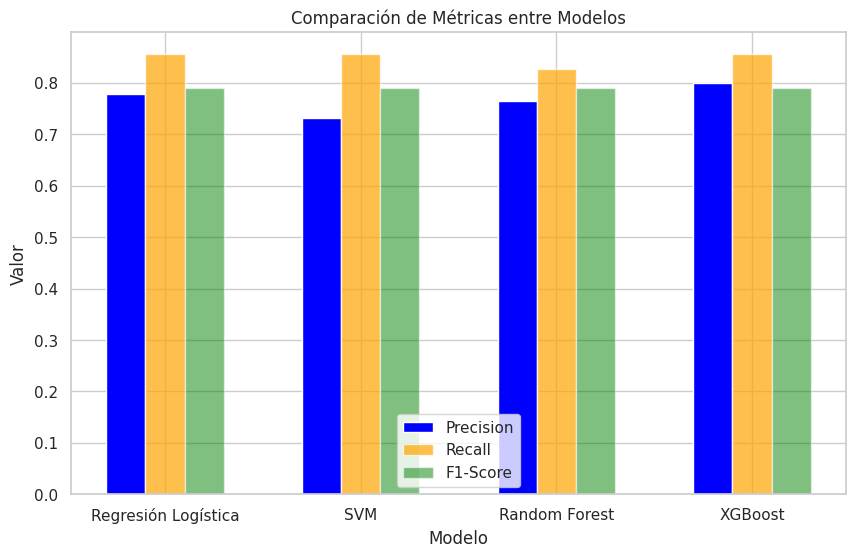

In [88]:
# Resultados de la regresión logística
precision_logistic, recall_logistic, f1_logistic, _ = precision_recall_fscore_support(y_test, y_pred_logistic, average='weighted')

# Resultados de SVM
precision_svm, recall_svm, f1_svm, _ = precision_recall_fscore_support(y_test, y_pred_svm, average='weighted')

# Resultados de Random Forest
precision_rf, recall_rf, f1_rf, _ = precision_recall_fscore_support(y_test, y_pred_rf, average='weighted')

# Resultados de XGBoost
precision_xgboost, recall_xgboost, f1_xgboost, _ = precision_recall_fscore_support(y_test, y_pred_xgboost, average='weighted')

# Crear un DataFrame con los resultados
results_df = pd.DataFrame({
    'Modelo': ['Regresión Logística', 'SVM', 'Random Forest', 'XGBoost'],
    'Precision': [precision_logistic, precision_svm, precision_rf, precision_xgboost],
    'Recall': [recall_logistic, recall_svm, recall_rf, recall_xgboost],
    'F1-Score': [f1_logistic, f1_svm, f1_rf, f1_xgboost]
})

# Gráfico de barras agrupadas
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

bar_width = 0.2
bar_positions = [0, 1, 2, 3]

# Barra para Precision
plt.bar(bar_positions, results_df['Precision'], width=bar_width, label='Precision', color='blue')

# Barra para Recall
plt.bar([pos + bar_width for pos in bar_positions], results_df['Recall'], width=bar_width, label='Recall', color='orange', alpha=0.7)

# Barra para F1-Score
plt.bar([pos + 2 * bar_width for pos in bar_positions], results_df['F1-Score'], width=bar_width, label='F1-Score', color='green', alpha=0.5)

# Añadir etiquetas y leyenda
plt.xlabel('Modelo')
plt.ylabel('Valor')
plt.title('Comparación de Métricas entre Modelos')
plt.xticks([pos + bar_width for pos in bar_positions], results_df['Modelo'])
plt.legend()

# Mostrar el gráfico
plt.show()

#### Obtenemos como resultado final que el modelo **SVM tiene alto Recall**, esto indica que el modelo SVM tiende a identificar correctamente la mayoría de las instancias positivas. En términos prácticos, el modelo SVM tiene una buena capacidad para encontrar casos positivos en comparación con los demás modelos.

# **Opción de Desbalance de Datos**

Text(0.5, 1.0, 'Análisis de Severidad de Accidente')

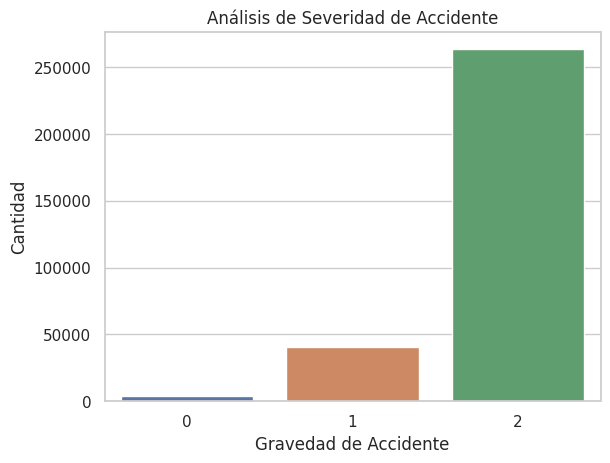

In [89]:
sns.countplot(data = dataCarros, x = 'Accident_Severity_encoded')
plt.xlabel('Gravedad de Accidente')
plt.ylabel('Cantidad')
plt.title('Análisis de Severidad de Accidente')

#### Debido a la alta separación de los datos, teniendo en (2) Slight 263 280 muestras (85.49%), en (1) Serious tenemos 40 740 (13.22%) y en (0) Fatal tenemos 3 953(1.28%), evidenciamos la necesidad de hacer uso de técnicas como oversampling u undersampling.

In [90]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [91]:
# Dividir el conjunto de datos en características (X) y etiquetas (y)
X = dataCarros.drop('Accident_Severity_encoded', axis=1)
y = dataCarros['Accident_Severity_encoded']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
# Aplicar SMOTE solo al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Verificar la distribución de las clases después de aplicar SMOTE
print(pd.Series(y_train_resampled).value_counts())

Accident_Severity_encoded
2    210617
1    210617
0    210617
Name: count, dtype: int64


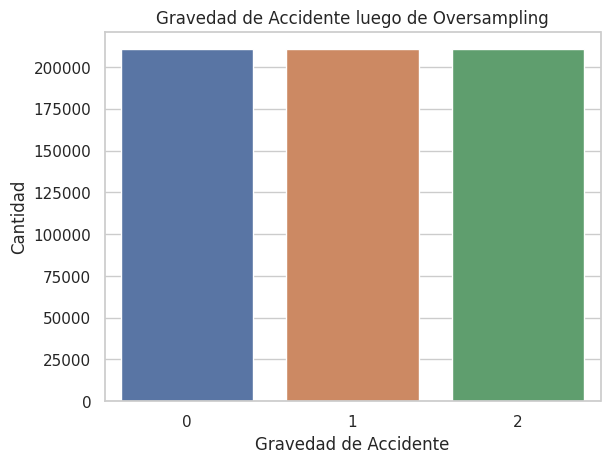

In [93]:
# Convertir el array unidimensional a DataFrame
df_resampled = pd.DataFrame({'Accident_Severity_encoded': y_train_resampled})

# Crear el gráfico de barras
sns.countplot(data=df_resampled, x='Accident_Severity_encoded')
plt.xlabel('Gravedad de Accidente')
plt.ylabel('Cantidad')
plt.title('Gravedad de Accidente luego de Oversampling')
plt.show()

# **Implementación de Algoritmos de Machine Learning**

## **Regresión Logística**

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [95]:
# Escalamos las variables independientes para mejorar el rendimiento del modelo
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [96]:
# Creamos el modelo de regresión logística
logistic_model = LogisticRegression()

In [97]:
# Entrenamos el modelo
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [98]:
# Realizamos predicciones en el conjunto de prueba
y_pred = logistic_model.predict(X_test_scaled)
y_pred_logistic = y_pred

In [99]:
# Evaluamos el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [100]:
# Imprimimos las métricas de rendimiento
print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:\n', confusion_mat)
print('Classification Report:\n', classification_rep)

Accuracy: 0.8549
Confusion Matrix:
 [[    3     2   826]
 [    2     5  8094]
 [    1    14 52648]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.00      0.01       831
           1       0.24      0.00      0.00      8101
           2       0.86      1.00      0.92     52663

    accuracy                           0.85     61595
   macro avg       0.53      0.33      0.31     61595
weighted avg       0.77      0.85      0.79     61595



## **Algoritmo de Máquina de Soporte Vectorial para Clasificación**

In [101]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [102]:
# Escalamos las variables independientes para mejorar el rendimiento del modelo
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [103]:
# Creamos el modelo de Máquinas de Soporte Vectorial
svm_model = SVC(kernel='linear', random_state=42)

In [104]:
# Entrenamos el modelo
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

In [105]:
# Realizamos predicciones en el conjunto de prueba
y_pred = svm_model.predict(X_test_scaled)
y_pred_svm = y_pred

In [106]:
# Evaluamos el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [107]:
# Imprimimos las métricas de rendimiento
print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:\n', confusion_mat)
print('Classification Report:\n', classification_rep)

Accuracy: 0.8550
Confusion Matrix:
 [[    0     0   831]
 [    0     0  8101]
 [    0     0 52663]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       831
           1       0.00      0.00      0.00      8101
           2       0.85      1.00      0.92     52663

    accuracy                           0.85     61595
   macro avg       0.28      0.33      0.31     61595
weighted avg       0.73      0.85      0.79     61595



## **Random Forest**

In [108]:
from sklearn.ensemble import RandomForestClassifier

In [109]:
# Creamos el modelo de Random Forest
random_forest_model = RandomForestClassifier(random_state=42)

In [110]:
# Entrenamos el modelo
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [111]:
# Realizamos predicciones en el conjunto de prueba
y_pred = random_forest_model.predict(X_test)
y_pred_rf = y_pred

In [112]:
# Evaluamos el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [113]:
# Imprimimos las métricas de rendimiento
print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:\n', confusion_mat)
print('Classification Report:\n', classification_rep)

Accuracy: 0.8269
Confusion Matrix:
 [[   10    88   733]
 [   47   577  7477]
 [  138  2181 50344]]
Classification Report:
               precision    recall  f1-score   support

           0       0.05      0.01      0.02       831
           1       0.20      0.07      0.11      8101
           2       0.86      0.96      0.91     52663

    accuracy                           0.83     61595
   macro avg       0.37      0.35      0.34     61595
weighted avg       0.76      0.83      0.79     61595



## **Gradient Boosting (XGBoost)**

In [114]:
import xgboost as xgb

In [115]:
# Creamos el modelo XGBoost
xgboost_model = xgb.XGBClassifier(random_state=42)

In [116]:
# Entrenamos el modelo
xgboost_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [117]:
# Realizamos predicciones en el conjunto de prueba
y_pred = xgboost_model.predict(X_test)
y_pred_xgboost = y_pred

In [118]:
# Evaluamos el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [119]:
# Imprimimos las métricas de rendimiento
print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:\n', confusion_mat)
print('Classification Report:\n', classification_rep)

Accuracy: 0.8547
Confusion Matrix:
 [[    2    13   816]
 [    3    50  8048]
 [    5    62 52596]]
Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.00      0.00       831
           1       0.40      0.01      0.01      8101
           2       0.86      1.00      0.92     52663

    accuracy                           0.85     61595
   macro avg       0.49      0.34      0.31     61595
weighted avg       0.79      0.85      0.79     61595



## **Evaluación de Métricas**

In [120]:
from sklearn.metrics import precision_recall_fscore_support

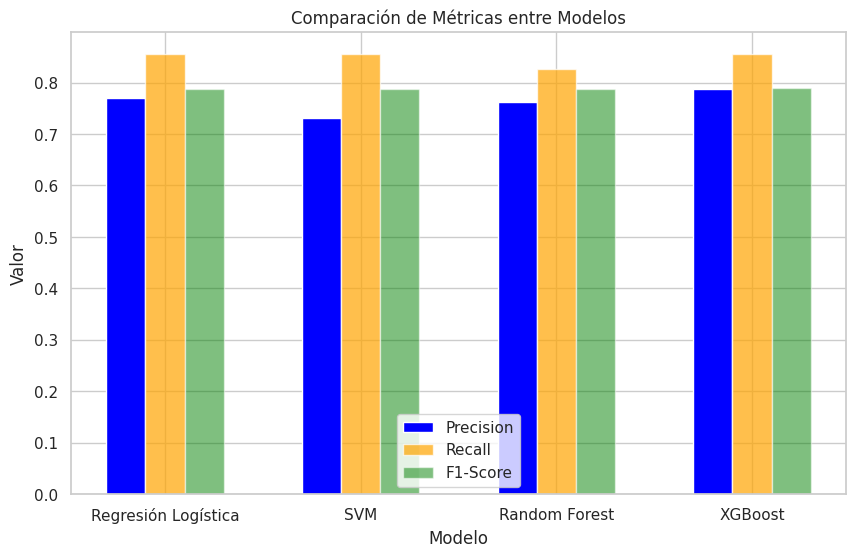

In [121]:
# Resultados de la regresión logística
precision_logistic, recall_logistic, f1_logistic, _ = precision_recall_fscore_support(y_test, y_pred_logistic, average='weighted')

# Resultados de SVM
precision_svm, recall_svm, f1_svm, _ = precision_recall_fscore_support(y_test, y_pred_svm, average='weighted')

# Resultados de Random Forest
precision_rf, recall_rf, f1_rf, _ = precision_recall_fscore_support(y_test, y_pred_rf, average='weighted')

# Resultados de XGBoost
precision_xgboost, recall_xgboost, f1_xgboost, _ = precision_recall_fscore_support(y_test, y_pred_xgboost, average='weighted')

# Crear un DataFrame con los resultados
results_df = pd.DataFrame({
    'Modelo': ['Regresión Logística', 'SVM', 'Random Forest', 'XGBoost'],
    'Precision': [precision_logistic, precision_svm, precision_rf, precision_xgboost],
    'Recall': [recall_logistic, recall_svm, recall_rf, recall_xgboost],
    'F1-Score': [f1_logistic, f1_svm, f1_rf, f1_xgboost]
})

# Gráfico de barras agrupadas
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

bar_width = 0.2
bar_positions = [0, 1, 2, 3]

# Barra para Precision
plt.bar(bar_positions, results_df['Precision'], width=bar_width, label='Precision', color='blue')

# Barra para Recall
plt.bar([pos + bar_width for pos in bar_positions], results_df['Recall'], width=bar_width, label='Recall', color='orange', alpha=0.7)

# Barra para F1-Score
plt.bar([pos + 2 * bar_width for pos in bar_positions], results_df['F1-Score'], width=bar_width, label='F1-Score', color='green', alpha=0.5)

# Añadir etiquetas y leyenda
plt.xlabel('Modelo')
plt.ylabel('Valor')
plt.title('Comparación de Métricas entre Modelos')
plt.xticks([pos + bar_width for pos in bar_positions], results_df['Modelo'])
plt.legend()

# Mostrar el gráfico
plt.show()

#### Obtenemos como resultado final que el modelo **SVM tiene alto Recall**, esto indica que el modelo SVM tiende a identificar correctamente la mayoría de las instancias positivas. En términos prácticos, el modelo SVM tiene una buena capacidad para encontrar casos positivos en comparación con los demás modelos.